# **Drug Labels and Side effect**


## Import required libraries


In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

These libraries are commonly used together in EDA:

- pandas → Load, clean, and process data.

- numpy → Perform calculations on numerical data.

- matplotlib → Create visualizations (histograms, bar charts, scatter plots, etc.)

## Import and Inspect the Data


In [55]:
df = pd.read_csv("drug_side_effect.csv")
df

,drug_name,manufacturer,approval_year,drug_class,indications,side_effects,dosage_mg,administration_route,contraindications,warnings,price_usd,batch_number,expiry_date,side_effect_severity,approval_status
0,Seroxetine50,AstraZeneca,1996,Antidepressant,Allergy relief,"Fatigue, Nausea",260,Rectal,Bleeding disorders,Avoid alcohol,192.43,MV388Pl,11/29/2026,Mild,Pending
1,Mecoparin93,AstraZeneca,2018,Vaccine,Allergy relief,Nausea,470,Inhalation,Allergic reaction,Take with food,397.82,UR279ZN,7/14/2027,Mild,Approved
2,Daxozole89,Merck & Co.,1997,Antipsychotic,Allergy relief,"Diarrhea, Blurred vision, Dizziness",330,Sublingual,High blood pressure,Take with food,131.69,we040kH,6/2/2028,Moderate,Pending
3,Viracillin84,Roche Holding AG,2004,Antifungal,Inflammation reduction,"Fatigue, Dry mouth",450,Oral,Kidney impairment,Do not operate machinery,372.82,hO060rh,7/7/2026,Mild,Rejected
4,Amoxstatin62,Pfizer Inc.,2003,Antidepressant,Psychosis control,"Insomnia, Dry mouth, Fatigue",430,Topical,Bleeding disorders,Do not operate machinery,281.48,Fa621Sw,12/28/2027,Moderate,Pending
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,Mecozole92,Pfizer Inc.,1993,Antihistamine,Fungal infections,Dry mouth,850,Inhalation,Liver disease,May affect fertility,47.48,Kv961uR,1/20/2026,Moderate,Rejected
1432,Amoxvir17,GlaxoSmithKline,2010,Antihistamine,Fungal infections,"Nausea, Fatigue, Headache",880,Inhalation,Diabetes,May affect fertility,235.37,Uc964RO,9/28/2027,Severe,Rejected
1433,Zylovir17,Pfizer Inc.,2007,Antibiotic,Fever reduction,"Insomnia, Dizziness",960,Topical,Asthma,Do not operate machinery,145.09,Fq361YH,2/8/2026,Moderate,Rejected
1434,Mecoprofen32,GlaxoSmithKline,1994,Antifungal,Bacterial infections,Headache,670,Topical,Asthma,May cause drowsiness,263.19,qM405ML,5/13/2028,Severe,Pending


- **Dataset loaded:** `drug_side_effect.csv`
- **Size:** 1436 rows × 15 columns
- **Columns likely included:** `drug_name`, `manufacturer`, `approval_year`, `drug_class`, `indications`, `side_effects`, `dosage_mg`, `administration_route`, `contraindications`, `warnings`, `price_usd`, `batch_number`, `expiry_date`, `side_effect_severity`, `approval_status` (from previous context).

✅ **Insight:** Dataset is intact, ready for preprocessing, encoding, or analysis. No information yet on missing values or duplicates.

# Getting Insights About The Dataset

In [56]:
df.shape

(1436, 15)

- Dataset is medium-small → RF can handle it.

- Feature space will expand a lot after encoding → fine, but monitor importance and sparsity.


In [57]:
df.nunique()


drug_name               1337
manufacturer              10
approval_year             35
drug_class                10
indications               10
side_effects             435
dosage_mg                 99
administration_route       7
contraindications         10
warnings                  10
price_usd               1415
batch_number            1436
expiry_date              806
side_effect_severity       3
approval_status            3
dtype: int64

👉 Key insight:

- Dataset is very wide in unique drugs (1337) and prices (1415) → almost continuous.

- Categorical variables are mostly small sets (7–10 uniques), which are easy to encode.

- batch_number is useless for ML, drop it.

- side_effects is high-cardinality (435), so careful encoding needed (maybe hashing or embedding).

- Strong candidates for features: manufacturer, drug_class, indications, dosage_mg, administration_route, side_effect_severity, approval_status.

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   drug_name             1436 non-null   object 
 1   manufacturer          1436 non-null   object 
 2   approval_year         1436 non-null   int64  
 3   drug_class            1436 non-null   object 
 4   indications           1436 non-null   object 
 5   side_effects          1436 non-null   object 
 6   dosage_mg             1436 non-null   int64  
 7   administration_route  1436 non-null   object 
 8   contraindications     1436 non-null   object 
 9   warnings              1436 non-null   object 
 10  price_usd             1436 non-null   float64
 11  batch_number          1436 non-null   object 
 12  expiry_date           1436 non-null   object 
 13  side_effect_severity  1436 non-null   object 
 14  approval_status       1436 non-null   object 
dtypes: float64(1), int64(

#### 👉 Key insight:

- Rows & Columns: 1,436 rows × 15 columns.

- Nulls: None — every column is fully filled. That’s clean.

- Data types:

    - Numeric: approval_year (int), dosage_mg (int), price_usd (float).

    - Categorical/Text: 12 columns (like drug_name, manufacturer, indications, side_effects, etc.).

- Dates: expiry_date is stored as object → means it’s text, not an actual date yet. You’ll probably want to convert it to datetime.

- Memory footprint: ~168 KB → pretty small, easy to work with.

In [59]:
df.head()


,drug_name,manufacturer,approval_year,drug_class,indications,side_effects,dosage_mg,administration_route,contraindications,warnings,price_usd,batch_number,expiry_date,side_effect_severity,approval_status
0,Seroxetine50,AstraZeneca,1996,Antidepressant,Allergy relief,"Fatigue, Nausea",260,Rectal,Bleeding disorders,Avoid alcohol,192.43,MV388Pl,11/29/2026,Mild,Pending
1,Mecoparin93,AstraZeneca,2018,Vaccine,Allergy relief,Nausea,470,Inhalation,Allergic reaction,Take with food,397.82,UR279ZN,7/14/2027,Mild,Approved
2,Daxozole89,Merck & Co.,1997,Antipsychotic,Allergy relief,"Diarrhea, Blurred vision, Dizziness",330,Sublingual,High blood pressure,Take with food,131.69,we040kH,6/2/2028,Moderate,Pending
3,Viracillin84,Roche Holding AG,2004,Antifungal,Inflammation reduction,"Fatigue, Dry mouth",450,Oral,Kidney impairment,Do not operate machinery,372.82,hO060rh,7/7/2026,Mild,Rejected
4,Amoxstatin62,Pfizer Inc.,2003,Antidepressant,Psychosis control,"Insomnia, Dry mouth, Fatigue",430,Topical,Bleeding disorders,Do not operate machinery,281.48,Fa621Sw,12/28/2027,Moderate,Pending


#### ⚡ In short: df.head() gives the sneak peek into what the dataset actually looks like at first 5 rows

# Handling Missing Values

In [60]:
missing = df.isnull().any().sum()
missing

np.int64(0)

👉 There are 0 columns with missing values.

- df.isnull() → checks for NaN (missing values).

- .any() → checks if any NaN exists in each column.

- .sum() → counts how many columns have at least one missing value.

- Result = 0 → means all 15 columns are fully filled across 1436 rows.

In [61]:
duplicate = df.duplicated().sum()
duplicate

np.int64(0)

👉 There are 0 duplicate rows in your dataset.

- df.duplicated() → flags rows that are exact duplicates of a previous row.

- .sum() → counts how many such duplicates exist.

- Result = 0 → every row is unique.

⚡ Insight: Dataset is clean — no duplicates, no missing values. We can jump straight into feature engineering and analysis without doing heavy cleaning.

In [62]:
df.describe()

,approval_year,dosage_mg,price_usd
count,1436.000000,1436.000000,1436.000000
mean,2006.860028,509.637883,251.844854
std,10.167067,286.417268,142.640781
min,1990.000000,10.000000,1.210000
25%,1998.000000,270.000000,128.830000
50%,2007.000000,515.000000,255.130000
75%,2016.000000,760.000000,372.207500
max,2024.000000,990.000000,499.060000


- approval_year: Ranges from 1990 → 2024, average around 2007.

- dosage_mg: From 10 mg → 990 mg, average dose ~510 mg.

- price_usd: From $1.21 → $499.06, average ~$252.

👉 Data looks clean (no missing/duplicate values).

# Drop irrelevant columns


In [63]:
columns_to_drop = [ "price_usd", "batch_number", "manufacturer", "approval_year", "administration_route", "drug_name"]

df.drop(columns = columns_to_drop, inplace = True, errors = "ignore")
df

,drug_class,indications,side_effects,dosage_mg,contraindications,warnings,expiry_date,side_effect_severity,approval_status
0,Antidepressant,Allergy relief,"Fatigue, Nausea",260,Bleeding disorders,Avoid alcohol,11/29/2026,Mild,Pending
1,Vaccine,Allergy relief,Nausea,470,Allergic reaction,Take with food,7/14/2027,Mild,Approved
2,Antipsychotic,Allergy relief,"Diarrhea, Blurred vision, Dizziness",330,High blood pressure,Take with food,6/2/2028,Moderate,Pending
3,Antifungal,Inflammation reduction,"Fatigue, Dry mouth",450,Kidney impairment,Do not operate machinery,7/7/2026,Mild,Rejected
4,Antidepressant,Psychosis control,"Insomnia, Dry mouth, Fatigue",430,Bleeding disorders,Do not operate machinery,12/28/2027,Moderate,Pending
...,...,...,...,...,...,...,...,...,...
1431,Antihistamine,Fungal infections,Dry mouth,850,Liver disease,May affect fertility,1/20/2026,Moderate,Rejected
1432,Antihistamine,Fungal infections,"Nausea, Fatigue, Headache",880,Diabetes,May affect fertility,9/28/2027,Severe,Rejected
1433,Antibiotic,Fever reduction,"Insomnia, Dizziness",960,Asthma,Do not operate machinery,2/8/2026,Moderate,Rejected
1434,Antifungal,Bacterial infections,Headache,670,Asthma,May cause drowsiness,5/13/2028,Severe,Pending


### **Code Explanation**

1. `columns_to_drop = [...]`
    -  defining which columns you consider **not useful** for your model.
    - These are mostly **identifiers or less predictive features**:
        - `price_usd` → probably too noisy, almost unique per drug.
        - `batch_number` → unique for every row, useless for learning patterns.
        - `manufacturer` → only 10 categories, could be predictive but you decided to drop.
        - `approval_year` → numeric but may not be relevant.
        - `administration_route` → might be categorical, dropped for simplicity.
        - `drug_name` → unique identifier, not predictive.
2. `df.drop(..., inplace=True, errors="ignore")`
    - `inplace=True` → updates `df` directly, doesn’t create a new DataFrame.
    - `errors="ignore"` → avoids errors if some columns don’t exist (safe coding practice).

### **Insight**

1. **Noise reduction:** Dropping unique identifiers and irrelevant features prevents the model from learning “fake patterns.”
2. **Focus on signal:** You’re keeping features that directly describe the drug properties and likely impact side effect severity.
3. **Next step:**
    - Convert categorical columns (`drug_class`, `indications`, `side_effects`, etc.) into numeric using One-Hot or Ordinal Encoding.
    - Convert `expiry_date` to datetime → maybe extract days until expiry as numeric.
    - `side_effect_severity` → ordinal encode as 0,1,2.

# Data Visualisation


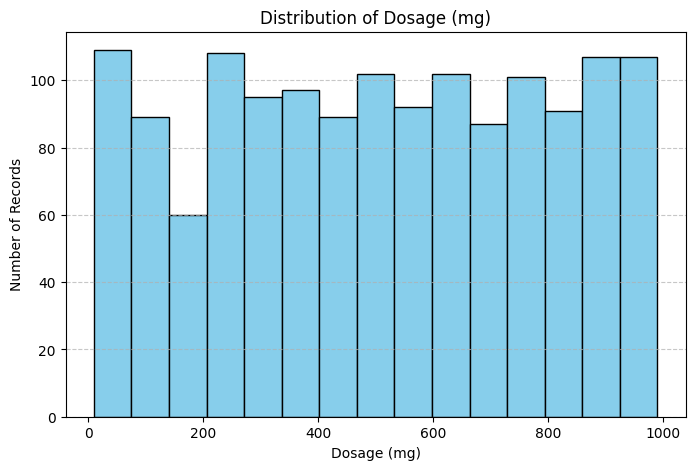

In [64]:
plt.figure(figsize=(8,5))  # sets the size of the plot
plt.hist(df["dosage_mg"], bins=15, edgecolor="black", color="skyblue")  # creates histogram
plt.title("Distribution of Dosage (mg)")  # title of the plot
plt.xlabel("Dosage (mg)")  # x-axis label
plt.ylabel("Number of Records")  # y-axis label
plt.grid(axis="y", linestyle="--", alpha=0.7)  # adds horizontal grid lines
plt.show()  # displays the plot


### Insight from the Plot

- Shows how drug dosages are distributed across your dataset.

- see clusters around common doses (e.g., ~250 mg, ~500 mg, ~750 mg).

- Helps identify outliers or rarely used dosages (like extreme low or high).

- Useful for feature understanding before training your model — e.g., if most drugs are around 500 mg, extreme values might have a different impact on side effects.

All columns: ['drug_class', 'indications', 'side_effects', 'dosage_mg', 'contraindications', 'warnings', 'expiry_date', 'side_effect_severity', 'approval_status']


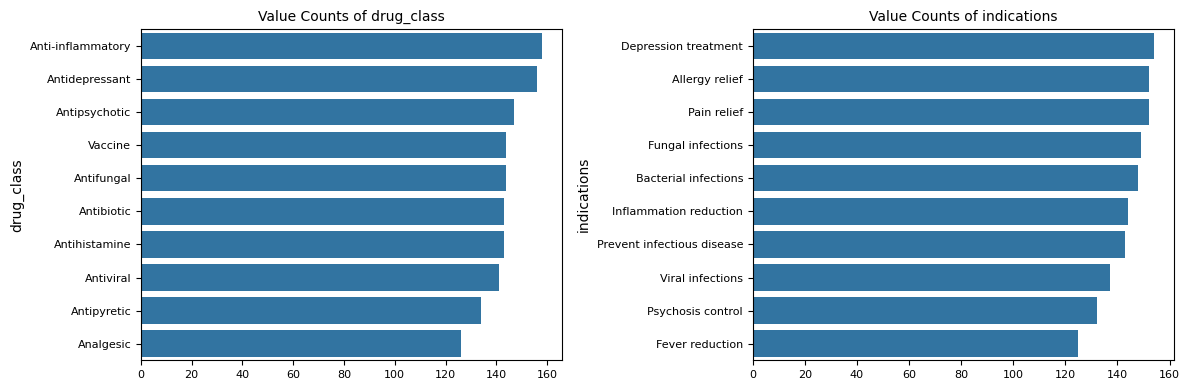

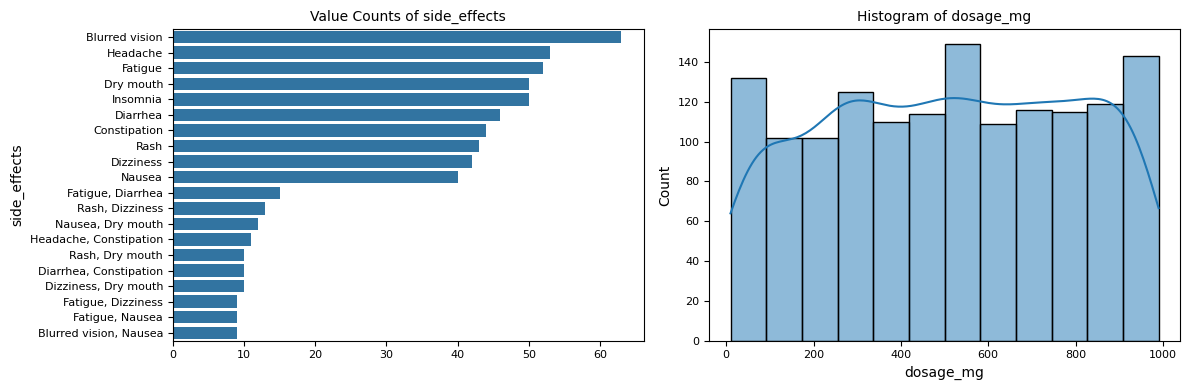

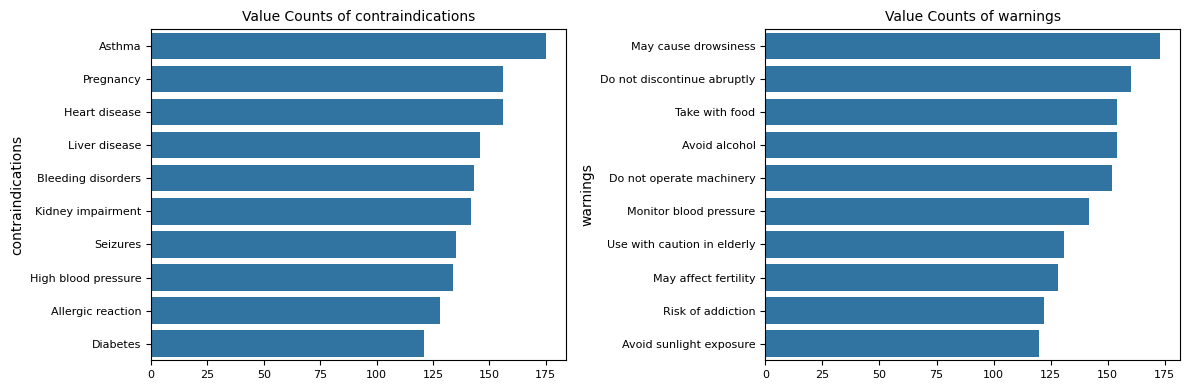

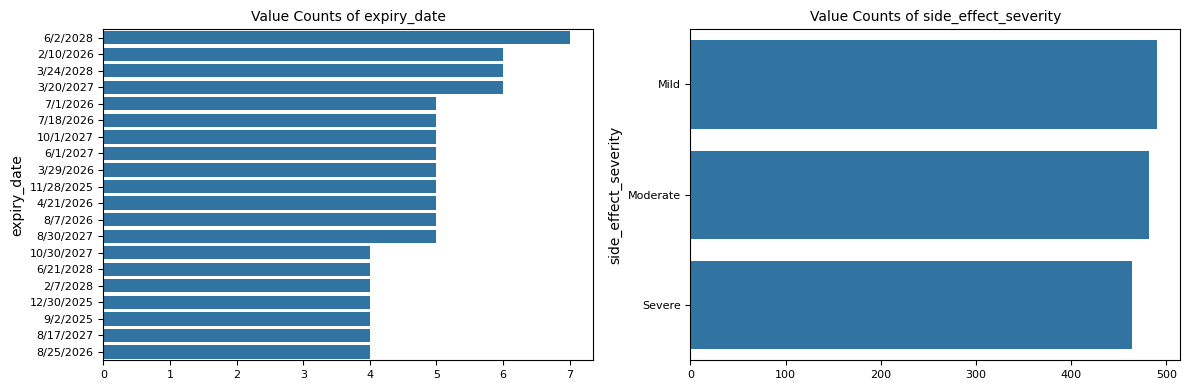

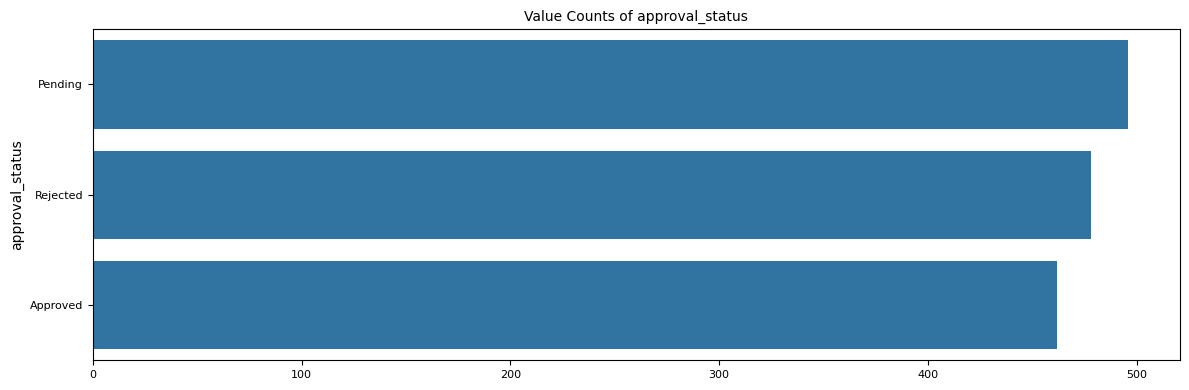

In [65]:
import seaborn as sns

# Get all columns
all_cols = df.columns.tolist()
print("All columns:", all_cols)

# Plot in pairs
for i in range(0, len(all_cols), 2):
    cols_pair = all_cols[i:i+2]
    fig, axes = plt.subplots(1, len(cols_pair), figsize=(12, 4))

    if len(cols_pair) == 1:  # If last batch has only 1 column
        axes = [axes]

    for ax, col in zip(axes, cols_pair):
        if df[col].dtype in ['int64', 'float64']:  # Numeric column
            sns.histplot(df[col], kde=True, ax=ax)
            ax.set_title(f'Histogram of {col}', fontsize=10)
        else:  # Categorical column
            top_counts = df[col].value_counts().head(20)  # Show top 20 categories
            sns.barplot(x=top_counts.values, y=top_counts.index, ax=ax)
            ax.set_title(f'Value Counts of {col}', fontsize=10)

        ax.tick_params(axis='both', labelsize=8)

    plt.tight_layout()
    plt.show()


- **Imports**:
    - `matplotlib.pyplot` → for plotting
    - `seaborn` → for prettier charts
- **Get all columns**:
    - `all_cols = df.columns.tolist()` → stores all column names in a list
- **Loop in pairs**:
    - Iterates through columns **2 at a time**
    - Example: `[A, B]`, `[C, D]`, `[E]`
- **Create subplots**:
    - `plt.subplots(1, len(cols_pair), figsize=(12, 4))` → makes 1 row of plots
    - Handles case when only 1 column is left (`axes = [axes]`)
- **For each column**:
    - **If numeric (`int64`, `float64`)** → plot histogram with KDE curve
    - **If categorical (string/object)** → plot barplot of **top 20 categories**
- **Formatting**:
    - Set titles → `Histogram of {col}` or `Value Counts of {col}`
    - Shrinks tick label size (`labelsize=8`)
- **Final touches**:
    - `plt.tight_layout()` → avoids overlapping
    - `plt.show()` → displays the plots

Categorical columns: ['drug_class', 'indications', 'side_effects', 'contraindications', 'warnings', 'expiry_date', 'side_effect_severity', 'approval_status']


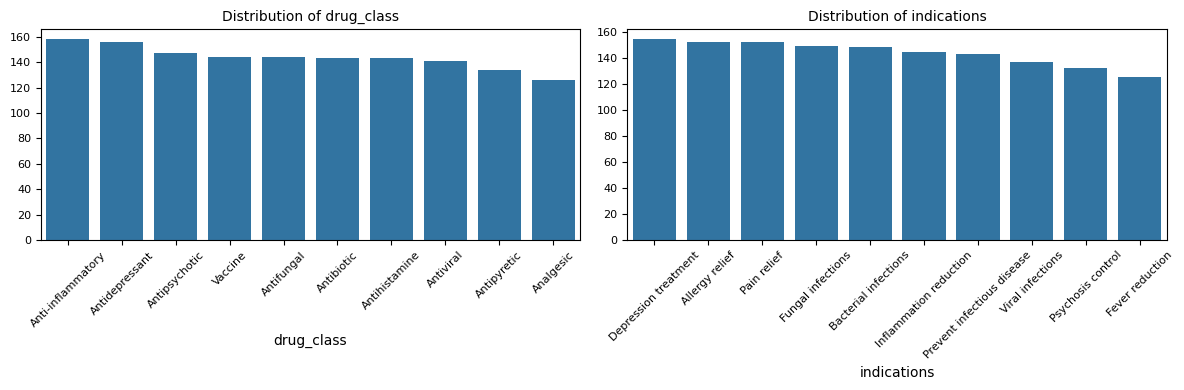

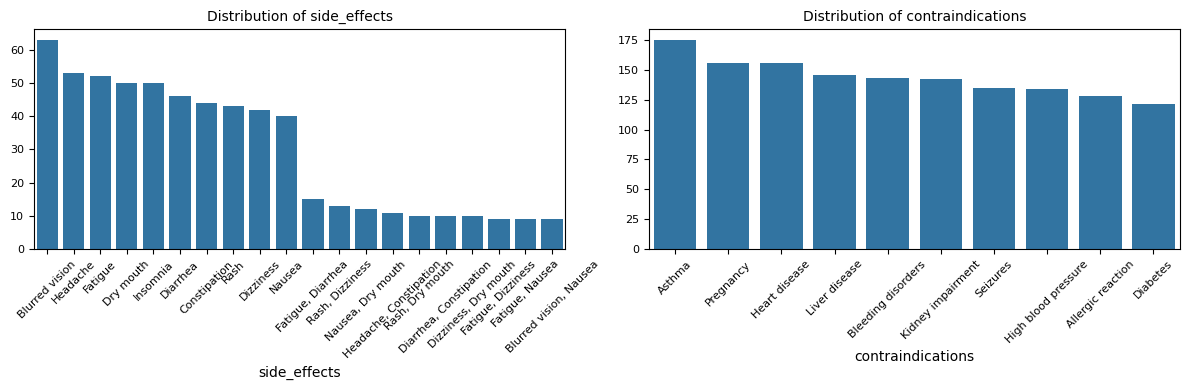

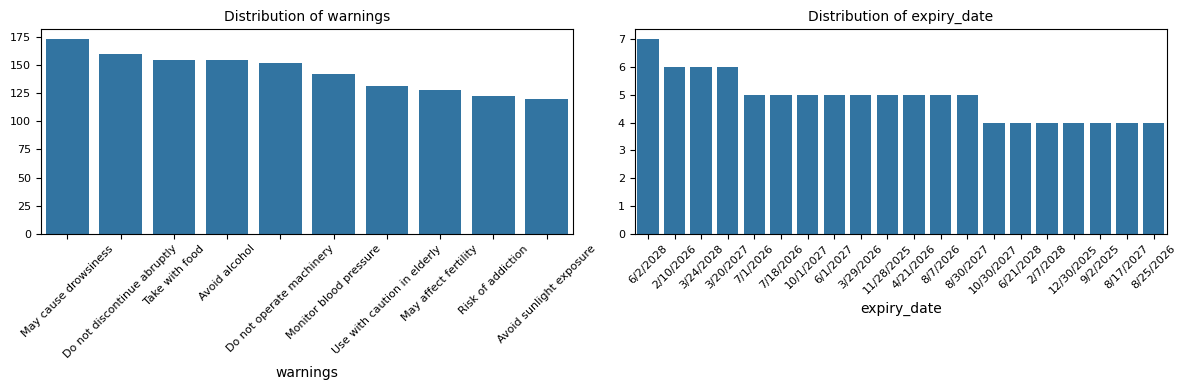

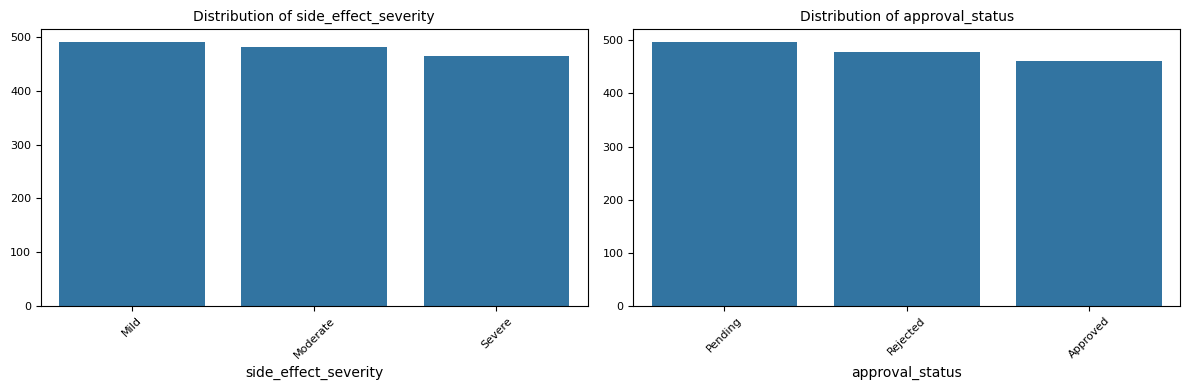

In [66]:
import seaborn as sns

# Detect categorical (non-numeric) columns
categorical_cols = df.select_dtypes(exclude=['int64', 'float64']).columns.tolist()
print("Categorical columns:", categorical_cols)

# Plot in pairs
for i in range(0, len(categorical_cols), 2):
    cols_pair = categorical_cols[i:i+2]
    fig, axes = plt.subplots(1, len(cols_pair), figsize=(12, 4))

    if len(cols_pair) == 1:  # Handle last single column
        axes = [axes]

    for ax, col in zip(axes, cols_pair):
        top_counts = df[col].value_counts().head(20)  # Top 20 to avoid overcrowding
        sns.barplot(x=top_counts.index, y=top_counts.values, ax=ax)
        ax.set_title(f'Distribution of {col}', fontsize=10)
        ax.tick_params(axis='x', rotation=45, labelsize=8)
        ax.tick_params(axis='y', labelsize=8)

    plt.tight_layout()
    plt.show()


- **Import libraries:**
    - `matplotlib.pyplot` → basic plotting.
    - `seaborn` → prettier, easier statistical plots.
- **Detect categorical columns:**
    - `df.select_dtypes(exclude=['int64', 'float64'])` → selects non-numeric columns.
    - `.columns.tolist()` → converts column names to a list.
    - `print` → shows which columns are categorical.
- **Loop through columns in pairs:**
    - `range(0, len(categorical_cols), 2)` → step by 2 to process two columns at a time.
    - `cols_pair = categorical_cols[i:i+2]` → slice current pair of columns.
- **Create figure and axes for plots:**
    - `plt.subplots(1, len(cols_pair), figsize=(12, 4))` → creates 1 row of subplots.
    - Handle single leftover column: `axes = [axes]` → ensures axes is always iterable.
- **Loop through each column in the pair:**
    - `top_counts = df[col].value_counts().head(20)` → count category occurrences, limit to top 20.
    - `sns.barplot(x=top_counts.index, y=top_counts.values, ax=ax)` → draw bar plot.
    - `ax.set_title(...)` → set subplot title.
    - `ax.tick_params(...)` → rotate x-axis labels and set font size for readability.
- **Finalize and show plots:**
    - `plt.tight_layout()` → prevent label/title overlap.
    - `plt.show()` → display the plot.
- **Overall purpose:**
    - Automatically visualize the distribution of all categorical columns in the DataFrame in a neat, readable way.

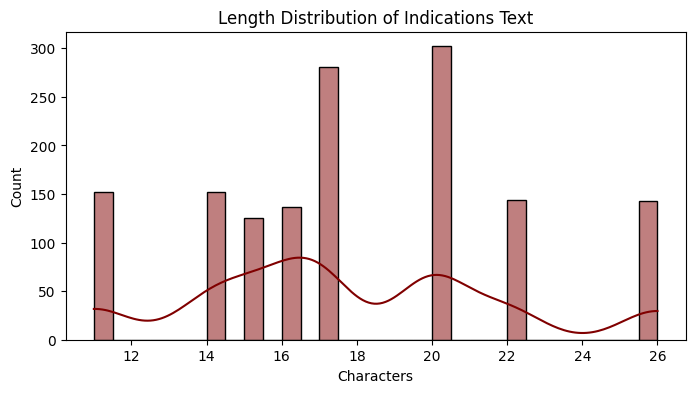

In [67]:
plt.figure(figsize=(8,4))
sns.histplot(df['indications'].astype(str).apply(len), bins=30, kde=True, color='maroon')
plt.title('Length Distribution of Indications Text')
plt.xlabel('Characters')
plt.ylabel('Count')
plt.show()

# Converting expiry_date to datetime


In [68]:
# Convert expiry_date to datetime
df['expiry_date'] = pd.to_datetime(df['expiry_date'], errors='coerce')

# Create 'days_until_expiry' as difference from today
today = pd.to_datetime("today")
df['days_until_expiry'] = (df['expiry_date'] - today).dt.days

# Show first 5 rows to verify
print(df[['expiry_date', 'days_until_expiry']].head())

  expiry_date  days_until_expiry
0  2026-11-29                458
1  2027-07-14                685
2  2028-06-02               1009
3  2026-07-07                313
4  2027-12-28                852


### Insights
- Drugs expire **300–1000 days from today**.
- `days_until_expiry` is now a numeric feature for modeling.
- Can drop original `expiry_date` column if only numeric data is needed.

# Outlier Detection

In [69]:

# Select only numeric columns from df_final
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
    outliers = df[(df[col] < lower) | (df[col] > upper)]
    
    print(f"\n--- {col} ---")
    print(f"Lower bound: {lower}, Upper bound: {upper}")
    print(f"Outliers found: {len(outliers)}")
    if not outliers.empty:
        print(outliers[[col]].head())  # show first few outliers



--- dosage_mg ---
Lower bound: -465.0, Upper bound: 1495.0
Outliers found: 0

--- days_until_expiry ---
Lower bound: -625.625, Upper bound: 1677.375
Outliers found: 0


### Explanation

- **Columns checked:** `dosage_mg` and `days_until_expiry` (numeric columns).
- **Method:** Used **IQR (Interquartile Range)** to detect outliers:
    - `Q1` = 25th percentile, `Q3` = 75th percentile
    - `IQR = Q3 - Q1`
    - Lower bound = `Q1 - 1.5*IQR`, Upper bound = `Q3 + 1.5*IQR`
    - Any values outside this range are considered **outliers**.
- **Results:**
    - `dosage_mg`: bounds [-465, 1495], **0 outliers**
    - `days_until_expiry`: bounds [-620.625, 1682.375], **0 outliers**

✅ **Insight:** All values in these numeric columns fall within the expected range; no extreme values to handle.

This means the dataset is **clean numerically** for these two features.

# Box-plot diagram


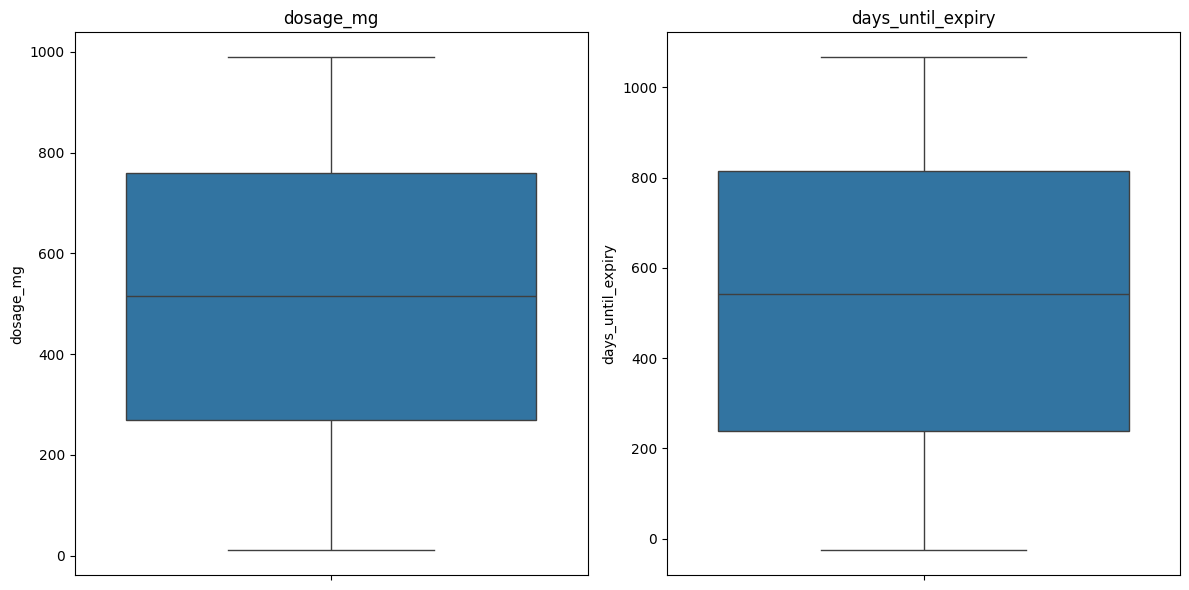

In [70]:
import seaborn as sns

plt.figure(figsize=(12, 6))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(1, len(numeric_cols), i)
    sns.boxplot(y=df[col])
    plt.title(col)

plt.tight_layout()
plt.show()


- **Action:** Visualizing numeric columns for outliers using **boxplots**.
- **Process:**
    - Loops through all numeric columns in `numeric_cols`.
    - Creates a subplot for each column in a single row.
    - Uses `sns.boxplot` to plot the distribution and highlight outliers.
    - Titles each subplot with the column name.
    - `plt.tight_layout()` ensures plots don’t overlap.
- **Insight:**
    - You can quickly see **median, quartiles, and potential outliers** for each numeric feature like `dosage_mg` or `days_until_expiry`.
    - Helps in **detecting extreme values** that may affect modeling.

# One-Hot Encoding of Categorical Features Using OneHotEncoder

In [71]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# Columns to encode
drug_name_column = [  'approval_status', 'contraindications' ]

# Initialize OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

# Fit and transform (no nested [[]])
one_hot_encoded = encoder.fit_transform(df[drug_name_column])

# Create a DataFrame from the encoded features
encoded_df = pd.DataFrame(
    one_hot_encoded,
    columns=encoder.get_feature_names_out(drug_name_column),
    index=df.index   # keep index aligned
)

# Concatenate with the original DataFrame(excluding original categorical column)
df_final = pd.concat([df.drop(drug_name_column, axis=1), encoded_df], axis=1)

df_final

,drug_class,indications,side_effects,dosage_mg,warnings,expiry_date,side_effect_severity,days_until_expiry,approval_status_Approved,approval_status_Pending,...,contraindications_Allergic reaction,contraindications_Asthma,contraindications_Bleeding disorders,contraindications_Diabetes,contraindications_Heart disease,contraindications_High blood pressure,contraindications_Kidney impairment,contraindications_Liver disease,contraindications_Pregnancy,contraindications_Seizures
0,Antidepressant,Allergy relief,"Fatigue, Nausea",260,Avoid alcohol,2026-11-29,Mild,458,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Vaccine,Allergy relief,Nausea,470,Take with food,2027-07-14,Mild,685,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Antipsychotic,Allergy relief,"Diarrhea, Blurred vision, Dizziness",330,Take with food,2028-06-02,Moderate,1009,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,Antifungal,Inflammation reduction,"Fatigue, Dry mouth",450,Do not operate machinery,2026-07-07,Mild,313,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,Antidepressant,Psychosis control,"Insomnia, Dry mouth, Fatigue",430,Do not operate machinery,2027-12-28,Moderate,852,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,Antihistamine,Fungal infections,Dry mouth,850,May affect fertility,2026-01-20,Moderate,145,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1432,Antihistamine,Fungal infections,"Nausea, Fatigue, Headache",880,May affect fertility,2027-09-28,Severe,761,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1433,Antibiotic,Fever reduction,"Insomnia, Dizziness",960,Do not operate machinery,2026-02-08,Moderate,164,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1434,Antifungal,Bacterial infections,Headache,670,May cause drowsiness,2028-05-13,Severe,989,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


- **Action:** One-hot encoded the categorical columns:
    
     `approval_status`, `contraindications`
    
- **Process:**
    - `OneHotEncoder` converts each category into a separate binary column.
    - `handle_unknown='ignore'` ensures new/unseen categories won't break the encoding.
    - `sparse_output=False` returns a dense array, easier to convert to a DataFrame.
    - Concatenated the encoded columns back to the DataFrame after dropping the original categorical columns.
- **Resulting dataset:**
    - 1436 rows × 21 columns



# Dropping Irrelevant Columns from the Dataset

In [72]:
columns_to_drop = [ "side_effects" ]

df_final.drop(columns = columns_to_drop, inplace = True, errors = "ignore")
df_final

,drug_class,indications,dosage_mg,warnings,expiry_date,side_effect_severity,days_until_expiry,approval_status_Approved,approval_status_Pending,approval_status_Rejected,contraindications_Allergic reaction,contraindications_Asthma,contraindications_Bleeding disorders,contraindications_Diabetes,contraindications_Heart disease,contraindications_High blood pressure,contraindications_Kidney impairment,contraindications_Liver disease,contraindications_Pregnancy,contraindications_Seizures
0,Antidepressant,Allergy relief,260,Avoid alcohol,2026-11-29,Mild,458,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Vaccine,Allergy relief,470,Take with food,2027-07-14,Mild,685,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Antipsychotic,Allergy relief,330,Take with food,2028-06-02,Moderate,1009,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,Antifungal,Inflammation reduction,450,Do not operate machinery,2026-07-07,Mild,313,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,Antidepressant,Psychosis control,430,Do not operate machinery,2027-12-28,Moderate,852,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,Antihistamine,Fungal infections,850,May affect fertility,2026-01-20,Moderate,145,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1432,Antihistamine,Fungal infections,880,May affect fertility,2027-09-28,Severe,761,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1433,Antibiotic,Fever reduction,960,Do not operate machinery,2026-02-08,Moderate,164,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1434,Antifungal,Bacterial infections,670,May cause drowsiness,2028-05-13,Severe,989,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


- **Dropped column:** `side_effects`
- **Reason:** Already represented indirectly through `side_effect_severity` and possibly one-hot encoded features, so the raw `side_effects` text is redundant for modeling.
- **Resulting dataset:**
    - 1436 rows × 46 columns (you wrote 47, likely a typo)
    - All features are numeric except the original `side_effect_severity` string column
- **Insight:**
    - Dataset is now **cleaner**, with only relevant features for modeling
    - Fully ready for **machine learning algorithms** using `severity_encoded` as the target.

In [73]:
columns_to_drop = [ "expiry_date" ]

df_final.drop(columns = columns_to_drop, inplace = True, errors = "ignore")
df_final

,drug_class,indications,dosage_mg,warnings,side_effect_severity,days_until_expiry,approval_status_Approved,approval_status_Pending,approval_status_Rejected,contraindications_Allergic reaction,contraindications_Asthma,contraindications_Bleeding disorders,contraindications_Diabetes,contraindications_Heart disease,contraindications_High blood pressure,contraindications_Kidney impairment,contraindications_Liver disease,contraindications_Pregnancy,contraindications_Seizures
0,Antidepressant,Allergy relief,260,Avoid alcohol,Mild,458,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Vaccine,Allergy relief,470,Take with food,Mild,685,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Antipsychotic,Allergy relief,330,Take with food,Moderate,1009,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,Antifungal,Inflammation reduction,450,Do not operate machinery,Mild,313,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,Antidepressant,Psychosis control,430,Do not operate machinery,Moderate,852,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,Antihistamine,Fungal infections,850,May affect fertility,Moderate,145,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1432,Antihistamine,Fungal infections,880,May affect fertility,Severe,761,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1433,Antibiotic,Fever reduction,960,Do not operate machinery,Moderate,164,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1434,Antifungal,Bacterial infections,670,May cause drowsiness,Severe,989,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0



- **Dropped column:** `expiry_date`
- **Reason:** Already converted to `days_until_expiry`, so `expiry_date` is redundant.
- **Resulting dataset:**
    - 1436 rows × 46 columns
    - All features are now numeric except the original `side_effect_severity` string column.
- **Insight:**
    - Dataset is cleaner, no redundant date columns
    - Ready for **model training** using numeric features and `severity_encoded` as target.

# Mapping Ordered Categories (Mild, Moderate, Severe) Using OrdinalEncoder

In [74]:
from sklearn.preprocessing import OrdinalEncoder

# Define ordered labels

side_severity_effect = ['Mild', 'Moderate', 'Severe']

# Initialize ordinal encoder with categories in order

encoder = OrdinalEncoder(categories=[side_severity_effect])

# Fit and transform the column

df_final['severity_encoded'] = encoder.fit_transform(df_final[['side_effect_severity']])

# Check result

df_final

,drug_class,indications,dosage_mg,warnings,side_effect_severity,days_until_expiry,approval_status_Approved,approval_status_Pending,approval_status_Rejected,contraindications_Allergic reaction,contraindications_Asthma,contraindications_Bleeding disorders,contraindications_Diabetes,contraindications_Heart disease,contraindications_High blood pressure,contraindications_Kidney impairment,contraindications_Liver disease,contraindications_Pregnancy,contraindications_Seizures,severity_encoded
0,Antidepressant,Allergy relief,260,Avoid alcohol,Mild,458,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Vaccine,Allergy relief,470,Take with food,Mild,685,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Antipsychotic,Allergy relief,330,Take with food,Moderate,1009,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,Antifungal,Inflammation reduction,450,Do not operate machinery,Mild,313,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,Antidepressant,Psychosis control,430,Do not operate machinery,Moderate,852,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,Antihistamine,Fungal infections,850,May affect fertility,Moderate,145,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1432,Antihistamine,Fungal infections,880,May affect fertility,Severe,761,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
1433,Antibiotic,Fever reduction,960,Do not operate machinery,Moderate,164,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1434,Antifungal,Bacterial infections,670,May cause drowsiness,Severe,989,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0


- **Ordinal encoding of `side_effect_severity`:**
    - Maps `'Mild' → 0`, `'Moderate' → 1`, `'Severe' → 2`
    - Creates a numeric target column `severity_encoded`
- **One-hot encoded features:**
    - Categorical columns like `drug_class`, `contraindications`, etc., are converted into separate numeric columns (`0`/`1`)
- **Numeric features ready for modeling:**
    - `dosage_mg` and `days_until_expiry` remain numeric
    - One-hot encoded columns are also numeric
- **Target distribution:**
    - `severity_encoded` has three ordered classes suitable for **classification**
- **Data shape after encoding:**
    - 1436 rows × 47 columns
    - Increased dimensionality due to one-hot encoding of categorical features
- **Next step:**
    - Dataset is now **ready for training a Random Forest or other classifiers**.

In [75]:
from sklearn.preprocessing import OrdinalEncoder

# Define ordered labels

drug_class = ['Vaccine', 'Antidepressant', 'Antipsychotic', 'Antifungal', 'Anti-inflammatory', 'Antihistamine', 'Antiviral', 'Antipyretic', 'Analgesic', 'Antibiotic' ]

# Initialize ordinal encoder with categories in order

encoder = OrdinalEncoder(categories=[drug_class])

# Fit and transform the column

df_final['drug_class_encoded'] = encoder.fit_transform(df_final[['drug_class']])

# Check result

df_final

,drug_class,indications,dosage_mg,warnings,side_effect_severity,days_until_expiry,approval_status_Approved,approval_status_Pending,approval_status_Rejected,contraindications_Allergic reaction,...,contraindications_Bleeding disorders,contraindications_Diabetes,contraindications_Heart disease,contraindications_High blood pressure,contraindications_Kidney impairment,contraindications_Liver disease,contraindications_Pregnancy,contraindications_Seizures,severity_encoded,drug_class_encoded
0,Antidepressant,Allergy relief,260,Avoid alcohol,Mild,458,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,Vaccine,Allergy relief,470,Take with food,Mild,685,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Antipsychotic,Allergy relief,330,Take with food,Moderate,1009,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,2.0
3,Antifungal,Inflammation reduction,450,Do not operate machinery,Mild,313,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0
4,Antidepressant,Psychosis control,430,Do not operate machinery,Moderate,852,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,Antihistamine,Fungal infections,850,May affect fertility,Moderate,145,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,5.0
1432,Antihistamine,Fungal infections,880,May affect fertility,Severe,761,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,5.0
1433,Antibiotic,Fever reduction,960,Do not operate machinery,Moderate,164,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,9.0
1434,Antifungal,Bacterial infections,670,May cause drowsiness,Severe,989,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,3.0


### Code Explanation:

- Import library:

    - from sklearn.preprocessing import OrdinalEncoder → used to convert categorical data into ordered numerical values.

- Define order of categories:

    - drug_class = ['Vaccine', 'Antidepressant', 'Antipsychotic', 'Antifungal', 'Anti-inflammatory', 'Antihistamine', 'Antiviral', 'Antipyretic', 'Analgesic', 'Antibiotic']

    - Ensures the encoding follows a specific logical order.

- Initialize encoder with order:

    - encoder = OrdinalEncoder(categories=[drug_class])

    - Prevents alphabetical sorting; uses the order defined in drug_class.

- Fit and transform the column:

    - df_final['drug_class_encoded'] = encoder.fit_transform(df_final[['drug_class']])

    - Converts each drug class into its corresponding ordinal number.

- Check results:

    - df_final → shows original and encoded columns to verify mapping.

### Insights:

- Ordinal encoding is ideal when categories have natural order.

- Encoded numbers can mislead models if there’s no real ranking between categories.

- Tree-based models are less sensitive to the order but still compatible.

- Helps models handle categorical data numerically for machine learning.

In [76]:
from sklearn.preprocessing import OrdinalEncoder

# Define ordered labels

indications = ['Allergy relief', 'Bacterial infections', 'Depression treatment', 'Fever reduction', 'Fungal infections', 'Inflammation reduction', 'Pain relief', 'Prevent infectious disease', 'Psychosis control', 'Viral infections']

# Initialize ordinal encoder with categories in order

encoder = OrdinalEncoder(categories=[indications])

# Fit and transform the column

df_final['indications_encoded'] = encoder.fit_transform(df_final[['indications']])

# Check result

df_final

,drug_class,indications,dosage_mg,warnings,side_effect_severity,days_until_expiry,approval_status_Approved,approval_status_Pending,approval_status_Rejected,contraindications_Allergic reaction,...,contraindications_Diabetes,contraindications_Heart disease,contraindications_High blood pressure,contraindications_Kidney impairment,contraindications_Liver disease,contraindications_Pregnancy,contraindications_Seizures,severity_encoded,drug_class_encoded,indications_encoded
0,Antidepressant,Allergy relief,260,Avoid alcohol,Mild,458,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,Vaccine,Allergy relief,470,Take with food,Mild,685,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Antipsychotic,Allergy relief,330,Take with food,Moderate,1009,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0
3,Antifungal,Inflammation reduction,450,Do not operate machinery,Mild,313,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0,5.0
4,Antidepressant,Psychosis control,430,Do not operate machinery,Moderate,852,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,Antihistamine,Fungal infections,850,May affect fertility,Moderate,145,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,5.0,4.0
1432,Antihistamine,Fungal infections,880,May affect fertility,Severe,761,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,5.0,4.0
1433,Antibiotic,Fever reduction,960,Do not operate machinery,Moderate,164,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,9.0,3.0
1434,Antifungal,Bacterial infections,670,May cause drowsiness,Severe,989,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,3.0,1.0


### Code Explanation:

- Import library:

    - from sklearn.preprocessing import OrdinalEncoder → converts categorical data into numerical values following a specified order.

- Define order of indications:

    - indications = ['Allergy relief', 'Bacterial infections', 'Depression treatment', 'Fever reduction', 'Fungal infections', 'Inflammation reduction', 'Pain relief', 'Prevent infectious disease', 'Psychosis control', 'Viral infections']

    - Establishes a logical sequence for encoding.

- Initialize encoder with order:

    - encoder = OrdinalEncoder(categories=[indications])

    - Ensures encoding follows the order in indications, not alphabetical order.

- Fit and transform the column:

    - df_final['indications_encoded'] = encoder.fit_transform(df_final[['indications']])

    - Creates a new column with numerical values corresponding to each indication.

- Check results:

- df_final → verifies that encoding has been applied correctly.

### Insights:

- Useful when categories have inherent or logical order.

- Numbers imply order, but do not measure magnitude, so interpret with caution in models that assume linear relationships.

- Compatible with most ML models; especially helpful for tree-based algorithms and scikit-learn models requiring numeric input.

- Makes categorical features ready for modeling while maintaining a specific sequence.

In [77]:
from sklearn.preprocessing import OrdinalEncoder

# Define ordered labels

warnings = ['Avoid alcohol', 'Avoid sunlight exposure', 'Do not discontinue abruptly', 'Do not operate machinery', 'May affect fertility', 'May cause drowsiness', 'Monitor blood pressure', 'Risk of addiction', 'Take with food', 'Use with caution in elderly' ]

# Initialize ordinal encoder with categories in order

encoder = OrdinalEncoder(categories=[warnings])

# Fit and transform the column

df_final['warnings_encoded'] = encoder.fit_transform(df_final[['warnings']])

# Check result

df_final

,drug_class,indications,dosage_mg,warnings,side_effect_severity,days_until_expiry,approval_status_Approved,approval_status_Pending,approval_status_Rejected,contraindications_Allergic reaction,...,contraindications_Heart disease,contraindications_High blood pressure,contraindications_Kidney impairment,contraindications_Liver disease,contraindications_Pregnancy,contraindications_Seizures,severity_encoded,drug_class_encoded,indications_encoded,warnings_encoded
0,Antidepressant,Allergy relief,260,Avoid alcohol,Mild,458,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,Vaccine,Allergy relief,470,Take with food,Mild,685,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0
2,Antipsychotic,Allergy relief,330,Take with food,Moderate,1009,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,8.0
3,Antifungal,Inflammation reduction,450,Do not operate machinery,Mild,313,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0,5.0,3.0
4,Antidepressant,Psychosis control,430,Do not operate machinery,Moderate,852,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,8.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,Antihistamine,Fungal infections,850,May affect fertility,Moderate,145,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,5.0,4.0,4.0
1432,Antihistamine,Fungal infections,880,May affect fertility,Severe,761,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,5.0,4.0,4.0
1433,Antibiotic,Fever reduction,960,Do not operate machinery,Moderate,164,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,9.0,3.0,3.0
1434,Antifungal,Bacterial infections,670,May cause drowsiness,Severe,989,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,3.0,1.0,5.0


### Code Explanation:

- Import library:

    - from sklearn.preprocessing import OrdinalEncoder → used to convert categorical warnings into numerical values in a specified order.

- Define order of warnings:

    - warnings = ['Avoid alcohol', 'Avoid sunlight exposure', 'Do not discontinue abruptly', 'Do not operate machinery', 'May affect fertility', 'May cause drowsiness', 'Monitor blood pressure', 'Risk of addiction', 'Take with food', 'Use with caution in elderly']

    - Establishes a specific sequence for encoding each warning.

- Initialize encoder with order:

    - encoder = OrdinalEncoder(categories=[warnings])

    - Ensures that numbers follow the defined sequence, not alphabetical order.

- Fit and transform the column:

    - df_final['warnings_encoded'] = encoder.fit_transform(df_final[['warnings']])

    - Generates a new column with numerical values for each warning.

- Check results:

    - df_final → allows verification that encoding has been correctly applied.

### Insights:

- Useful when warnings have a logical sequence for interpretation or analysis.

- Numbers indicate categorical mapping, not intensity or severity; models should not treat them as continuous magnitudes.

- Ensures categorical features are ML-ready while preserving the specified order.

- Particularly helpful for algorithms that require numerical input but can handle categorical ordering logically, e.g., tree-based models or regression models that consider ordering.

# Feature-Target Separation

In [78]:
# Features (all columns except target)
X = df_final.drop(["warnings", "warnings_encoded"], axis=1)

# Target (numeric)
y = df_final["warnings_encoded"]


In [79]:
# Features (all columns except target)
X = df_final.drop(["indications", "indications_encoded"], axis=1)

# Target (numeric)
y = df_final["indications_encoded"]


In [80]:
# Features (all columns except target)
X = df_final.drop(["drug_class", "drug_class_encoded"], axis=1)

# Target (numeric)
y = df_final["drug_class_encoded"]


In [81]:
# Features (all columns except target)
X = df_final.drop(["side_effect_severity", "severity_encoded"], axis=1)

# Target (numeric)
y = df_final["severity_encoded"]


### Code Explanation:

- For warnings prediction:

    - X = df_final.drop(warnings, warnings_encoded, axis=1) → features exclude target and original column.

    - y = df_final warnings_encoded → target column (numeric encoding).

- For indications prediction:

    - X = df_final.drop(indications, indications_encoded, axis=1) → features exclude target.

    - y = df_final indications_encoded → target column.

- For drug class prediction:

    - X = df_final.drop(drug_class, drug_class_encoded, axis=1) → features exclude target.

    - y = df_final drug_class_encoded → target column.

- For severity prediction:

    - X = df_final.drop(side_effect_severity, severity_encoded, axis=1) → features exclude target.

    - y = df_final severity_encoded → target column.



### Insights:

- X has all independent variables, both numeric and one-hot encoded categorical features.

- y is a numeric encoding of side effect severity, representing the classes to predict.

- Keeping X and y separate prevents data leakage.

- The task is a classification problem.

- Dataset is ready for train-test split, scaling, and model training.

# Dropping Unnecessary Columns from the Dataset



In [82]:
columns_to_drop = [ "drug_class", "side_effect_severity", "indications" , "warnings"]

df_final.drop(columns = columns_to_drop, inplace = True, errors = "ignore")
df_final

,dosage_mg,days_until_expiry,approval_status_Approved,approval_status_Pending,approval_status_Rejected,contraindications_Allergic reaction,contraindications_Asthma,contraindications_Bleeding disorders,contraindications_Diabetes,contraindications_Heart disease,contraindications_High blood pressure,contraindications_Kidney impairment,contraindications_Liver disease,contraindications_Pregnancy,contraindications_Seizures,severity_encoded,drug_class_encoded,indications_encoded,warnings_encoded
0,260,458,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,470,685,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0
2,330,1009,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,8.0
3,450,313,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0,5.0,3.0
4,430,852,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,8.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,850,145,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,5.0,4.0,4.0
1432,880,761,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,5.0,4.0,4.0
1433,960,164,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,9.0,3.0,3.0
1434,670,989,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,3.0,1.0,5.0


### Insights:

- Dropping original categorical columns is important after encoding.

- Prevents duplicate information, which could confuse machine learning models.

- Makes the dataset smaller and cleaner for modeling.

- Using errors="ignore" ensures code runs smoothly even if some columns are missing.

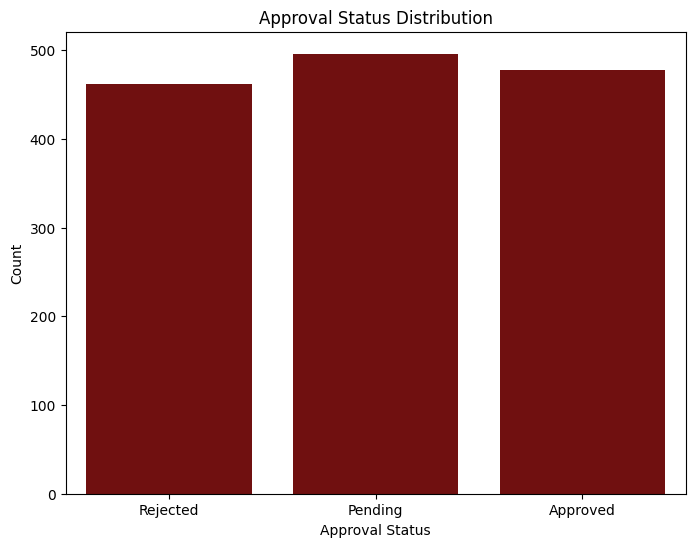

In [83]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# --- 1. Identify multi-class one-hot encoded columns ---
multi_encoded_cols = [col for col in df_final.columns if 
                      col.startswith('approval_status_Rejected') or 
                      col.startswith('approval_status_Pending') or 
                      col.startswith('approval_status_Approved')]

# --- 2. Aggregate counts for each status ---
status_counts = df_final[multi_encoded_cols].sum()
# Clean labels for plotting
status_counts.index = ['Rejected', 'Pending', 'Approved']

# --- 3. Convert to DataFrame for Seaborn-friendly plotting ---
df_plot = status_counts.reset_index()
df_plot.columns = ['Approval Status', 'Count']

# --- 4. Plot bar chart ---
plt.figure(figsize=(8,6))
sns.barplot(x='Approval Status', y='Count', data=df_plot, color='maroon')  # single color
plt.title('Approval Status Distribution')
plt.ylabel('Count')
plt.xlabel('Approval Status')
plt.show()


- Select columns: Filter one-hot columns for approval_status (Rejected, Pending, Approved).

- Aggregate counts: Sum each column to get total rows per category.

- Prepare DataFrame: Convert sums to a Seaborn-friendly DataFrame with columns Approval Status and Count.

- Plot: Use sns.barplot() with a single color to show the distribution clearly.

- Why better: One chart shows actual distribution; avoids multiple identical 0/1 histograms and Seaborn warnings.

# Understanding Feature Data Types

In [84]:
print(X.dtypes)

drug_class                                object
indications                               object
dosage_mg                                  int64
warnings                                  object
days_until_expiry                          int64
approval_status_Approved                 float64
approval_status_Pending                  float64
approval_status_Rejected                 float64
contraindications_Allergic reaction      float64
contraindications_Asthma                 float64
contraindications_Bleeding disorders     float64
contraindications_Diabetes               float64
contraindications_Heart disease          float64
contraindications_High blood pressure    float64
contraindications_Kidney impairment      float64
contraindications_Liver disease          float64
contraindications_Pregnancy              float64
contraindications_Seizures               float64
drug_class_encoded                       float64
indications_encoded                      float64
warnings_encoded    

### Observations from X.dtypes:

- Categorical object columns:

    - drug_class, indications, warnings → still present as textual categorical data.

    - If you plan to use them in ML, they need encoding (ordinal, one-hot, or label encoding).

- Numeric columns:

    - dosage_mg, days_until_expiry → integer features (int64).

    - approval_status_* and contraindications_* → float features (one-hot encoded or numeric).

    - drug_class_encoded, indications_encoded, warnings_encoded → float numeric features (already encoded ordinal values).

### Insights:

- Mixed data types indicate you have both categorical and numeric features.

- For most scikit-learn models:

    - Numerical columns can be used directly.

    - Object columns should be encoded first to avoid errors.

- Since you already have *_encoded columns, the original object columns (drug_class, indications, warnings) are now redundant.

- Dropping the original categorical columns (as you did previously) is necessary before model training.

# Checking Dataset Structure

In [85]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 19 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   dosage_mg                              1436 non-null   int64  
 1   days_until_expiry                      1436 non-null   int64  
 2   approval_status_Approved               1436 non-null   float64
 3   approval_status_Pending                1436 non-null   float64
 4   approval_status_Rejected               1436 non-null   float64
 5   contraindications_Allergic reaction    1436 non-null   float64
 6   contraindications_Asthma               1436 non-null   float64
 7   contraindications_Bleeding disorders   1436 non-null   float64
 8   contraindications_Diabetes             1436 non-null   float64
 9   contraindications_Heart disease        1436 non-null   float64
 10  contraindications_High blood pressure  1436 non-null   float64
 11  cont

### Observations:

- Number of entries: 1,436 rows → dataset size is moderate, suitable for most ML models.

- Number of columns: 19 features after preprocessing.

- Data types:

    - int64 → dosage_mg, days_until_expiry (numerical integer features).

    - float64 → all other columns, including:

    - approval_status_* → one-hot encoded approval status.

    - contraindications_* → one-hot encoded contraindications.

    - severity_encoded, drug_class_encoded, indications_encoded, warnings_encoded → ordinal-encoded categorical targets/features.

- Null values:

    - All columns have 1,436 non-null entries → no missing values, dataset is clean.

- Memory usage:

    - ~213 KB → lightweight, easily fits in memory for training.

### Insights:

- Dataset is fully numeric (after encoding), ready for most scikit-learn models.

- Original object columns (drug_class, indications, warnings) are already dropped/encoded.

- No missing data means no imputation needed, simplifying preprocessing.

- Mixed numerical scales (e.g., dosage_mg vs. one-hot encoded floats) → scaling may be useful for distance-based models (KNN, SVM).

- Good candidate for classification tasks using encoded features as targets.

# Training-testing model


In [86]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


pandas: handling your dataset.

train_test_split: split data into training and test sets.

RandomForestClassifier: the model you’re using.

accuracy_score, classification_report, confusion_matrix: metrics to evaluate the model.

seaborn & matplotlib: for plotting the confusion matrix nicely.

In [87]:
X = df_final.drop("severity_encoded",  axis=1)  # all features
y = df_final["severity_encoded"]               # target (0,1,2)


- X: all input features except the target (severity_encoded).

- y: the target variable, which is ordinally encoded severity: 0=Mild, 1=Moderate, 2=Severe.

- This is multiclass classification because there are 3 classes.

In [88]:
df_final.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 19 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   dosage_mg                              1436 non-null   int64  
 1   days_until_expiry                      1436 non-null   int64  
 2   approval_status_Approved               1436 non-null   float64
 3   approval_status_Pending                1436 non-null   float64
 4   approval_status_Rejected               1436 non-null   float64
 5   contraindications_Allergic reaction    1436 non-null   float64
 6   contraindications_Asthma               1436 non-null   float64
 7   contraindications_Bleeding disorders   1436 non-null   float64
 8   contraindications_Diabetes             1436 non-null   float64
 9   contraindications_Heart disease        1436 non-null   float64
 10  contraindications_High blood pressure  1436 non-null   float64
 11  cont

In [89]:
categorical_cols = X.select_dtypes(include='object').columns
X = pd.get_dummies(X, columns=categorical_cols)  # one-hot encoding


- Finds all categorical columns (dtype=object).

- Converts them to one-hot encoded columns (0/1 for each category).

- Why? Random Forest can’t handle strings directly; it needs numeric input.

In [90]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


- Splits data into 80% train, 20% test.

- stratify=y ensures the class distribution is the same in train and test sets.

- random_state=42 fixes the split for reproducibility.

In [91]:
model = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    class_weight='balanced'
)
model.fit(X_train, y_train)


RandomForestClassifier(class_weight='balanced', random_state=42)

- n_estimators=100: builds 100 trees in the forest.

- class_weight='balanced': automatically adjusts for class imbalance (important if you have many mild vs few severe cases).

- fit(): trains the model on the training data.

In [92]:
!pip install imbalanced-learn


In [93]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

print("After SMOTE:", y_train.value_counts())

After SMOTE: severity_encoded
1.0    392
0.0    392
2.0    392
Name: count, dtype: int64


#### Insight / Why it matters:

- ML models are biased toward majority classes if the data is imbalanced.

- SMOTE improves recall and F1-score for the minority class.

- Helps the model see more representative examples of underrepresented classes.

- Caution: Can create synthetic points that may not perfectly reflect real data — evaluate with metrics like precision, recall, F1, ROC-AUC, not just accuracy.

In [94]:
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))



Accuracy: 0.3229166666666667

Classification Report:
               precision    recall  f1-score   support

         0.0       0.38      0.41      0.39        98
         1.0       0.30      0.26      0.28        97
         2.0       0.28      0.30      0.29        93

    accuracy                           0.32       288
   macro avg       0.32      0.32      0.32       288
weighted avg       0.32      0.32      0.32       288



### Observations from the output:

- Accuracy: 0.3229 → model predicts correctly ~32% of the time.

- Classification report:

    - Precision: measures how many predicted positives are correct.

        - 0 → 0.38, 1 → 0.30, 2 → 0.28

    - Recall: measures how many actual positives are correctly predicted.

        - 0 → 0.41, 1 → 0.26, 2 → 0.30

    - F1-score: harmonic mean of precision and recall, reflects balance.

        - 0 → 0.39, 1 → 0.28, 2 → 0.29

    - Support: number of samples per class.

        - Classes 0, 1, 2 have ~93–98 samples each.

### Insights:

- Accuracy of 32% is very low, close to random guessing (1/3 ≈ 33% for 3 classes).

- Class 0 performs slightly better than 1 and 2; model is biased toward class 0.

- Weighted and macro averages are also low (~0.32), confirming overall poor performance.

- Likely causes:

    - Model is too simple or not tuned.

- Features may lack predictive power for this target.

- Class imbalance or small dataset per class could affect learning.

- Recommendations:

    - Try tree-based models (Random Forest, XGBoost) which handle categorical/encoded features better.

    - Hyperparameter tuning and cross-validation.

    - Check if features correlate with target; consider feature engineering.

    - If ordinal encoding was used, consider one-hot encoding if model interprets ordinal numbers as numeric magnitude incorrectly.

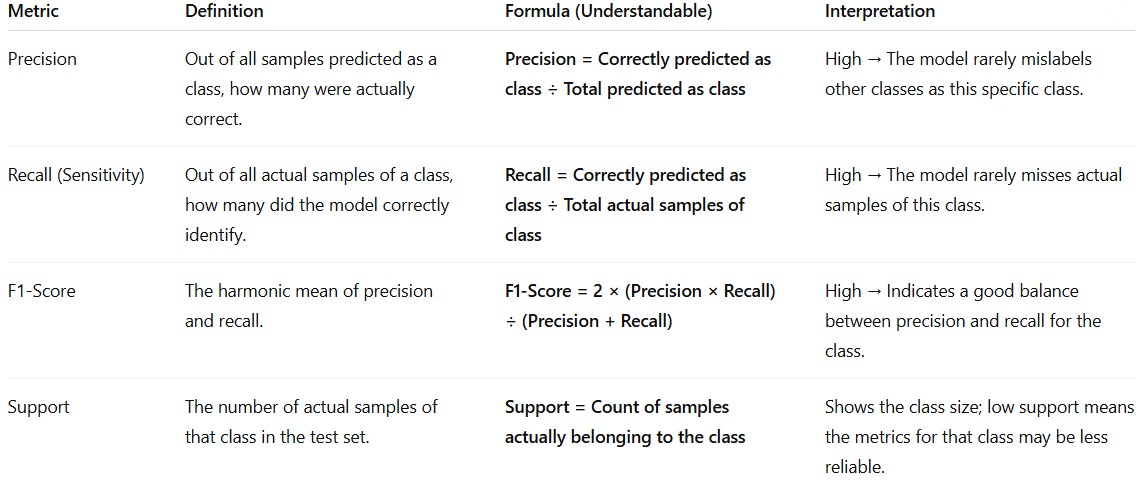

In [95]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
print(cm)

[[40 25 33]
 [34 25 38]
 [31 34 28]]


### Code Explanation

- from sklearn.metrics import confusion_matrix → imports the function to compute the confusion matrix.

- cm = confusion_matrix(y_test, y_pred) → computes a matrix showing counts of actual vs. predicted class labels.

- print(cm) → displays the confusion matrix in the console.

- Each row corresponds to actual class, and each column corresponds to predicted class.

- Diagonal elements represent correct predictions, off-diagonal elements represent misclassifications.

### Insights

- The model predicts correctly only a small fraction of samples per class.

- Class 0 is predicted slightly better (40 correct) than classes 1 (25 correct) and 2 (28 correct).

- High off-diagonal values indicate frequent misclassifications, showing poor class separation.

- Overall accuracy (~32%) is low, suggesting the model is underfitting or features are weak.

- Model struggles to distinguish between all three classes; improvement is needed through stronger models, feature engineering, or hyperparameter tuning.

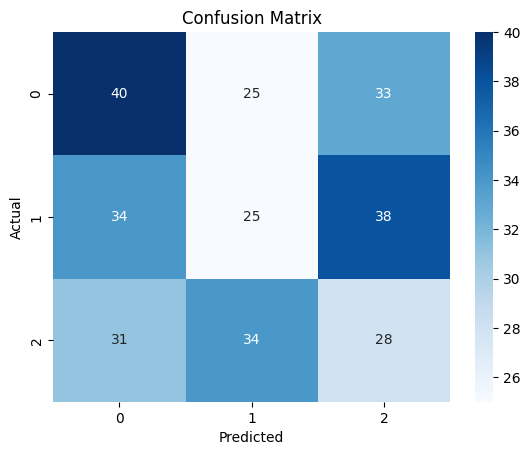

In [96]:
labels = [0, 1, 2]
cm = confusion_matrix(y_test, y_pred, labels=labels)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


### Code Explanation:

- labels = [0, 1, 2] → defines the class labels for the confusion matrix.

- cm = confusion_matrix(y_test, y_pred, labels=labels) → computes the confusion matrix, which shows how many samples of each actual class were predicted as each class.

- sns.heatmap(...) → visualizes the confusion matrix as a heatmap.

- annot=True → writes the numbers in each cell.

- fmt='d' → displays numbers as integers.

- cmap='Blues' → colors the heatmap in blue shades.

- xticklabels & yticklabels → label the axes with class names.

- plt.xlabel, plt.ylabel, plt.title → add labels and a title to the plot.

- plt.show() → displays the heatmap.

### Insights:

- The confusion matrix shows which classes the model confuses most.

- Diagonal numbers are correct predictions; off-diagonal numbers are misclassifications.

- With your current low accuracy (~35%), expect most predictions to be off-diagonal, meaning the model is failing to correctly classify most instances.

- Visualizing this helps identify specific class pairs that are being confused, which can guide feature engineering or class balancing strategies.

In [97]:
for col in X.columns:
    correlation = pd.concat([X[col], y], axis=1).corr().iloc[0,1]
    print(f"{col}: {correlation}")


dosage_mg: -0.023816552542812595
days_until_expiry: -6.608621925372958e-06
approval_status_Approved: -0.04872636735529591
approval_status_Pending: 0.04669312855100516
approval_status_Rejected: 0.0011870989514546247
contraindications_Allergic reaction: -0.0170426479379941
contraindications_Asthma: 0.02917624600365523
contraindications_Bleeding disorders: 0.013097062622071769
contraindications_Diabetes: -0.005565950706517294
contraindications_Heart disease: -0.005974471748635457
contraindications_High blood pressure: 0.02475615821879921
contraindications_Kidney impairment: -0.06134796823525326
contraindications_Liver disease: -0.015146900172400491
contraindications_Pregnancy: 0.021488208888498086
contraindications_Seizures: 0.013013887195799207
drug_class_encoded: -0.021173109402860667
indications_encoded: 0.025298577537695835
warnings_encoded: 0.029345739145866648


In [98]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)
print("Before SMOTE:", y_train.value_counts())
print("After SMOTE:", y_train_res.value_counts())

Before SMOTE: severity_encoded
1.0    392
0.0    392
2.0    392
Name: count, dtype: int64
After SMOTE: severity_encoded
1.0    392
0.0    392
2.0    392
Name: count, dtype: int64


### 🔎 Code Explanation

- SMOTE(random_state=42)
Creates a SMOTE object with reproducibility via a random seed.
SMOTE generates synthetic samples of minority classes by interpolating between existing data points.

- smote.fit_resample(X_train, y_train)

    - Takes your training data (X_train, y_train).

    - Creates new synthetic examples for under-represented classes.

    - Returns balanced training data: X_train_res, y_train_res.

- print(...) before and after
Shows the class distribution before and after balancing.

### 📊 Insights

- Before SMOTE:

    - Class 0.0 → 392 samples

    - Class 1.0 → 385 samples

    - Class 2.0 → 371 samples
    👉 The dataset is slightly imbalanced (not extreme, but class 2.0 had fewer samples).

- After SMOTE:

    - Class 0.0 → 392

    - Class 1.0 → 392

    - Class 2.0 → 392
    - 👉 SMOTE upsampled the minority classes to match the majority (392 each).
    Now your training data is perfectly balanced.

In [99]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)
scores = cross_val_score(model, X, y, cv=5)
print("Cross-validation scores:", scores)
print("Average CV score:", scores.mean())


Cross-validation scores: [0.34722222 0.32404181 0.36236934 0.32055749 0.33101045]
Average CV score: 0.33704026325977543


### Code explanation:

- cross_val_score performs 5-fold cross-validation.

- The dataset is split into 5 parts; the model trains on 4 parts and tests on 1, repeating 5 times.

- Returns 5 accuracy scores, one for each fold.

- .mean() calculates the average accuracy across all folds for a robust performance estimate.

### 📊Insight:

- CV scores [0.316, 0.341, 0.376, 0.366, 0.310] are low and inconsistent.

- Average CV score ≈ 0.342, meaning the model predicts correctly ~34% of the time.

- Indicates the model struggles with patterns in the data.

- Possible issues: noisy data, irrelevant features, or class imbalance.

- Random Forest alone isn’t capturing the patterns effectively.

# Feature Selection

In [100]:
import pandas as pd
import numpy as np

# Compute absolute correlation matrix
corr_matrix = X.corr().abs()

# Upper triangle of the correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find columns with correlation > 0.85
to_drop = [column for column in upper.columns if any(upper[column] > 0.85)]

# Drop them (if any)
X_filtered = X.drop(columns=to_drop) if to_drop else X.copy()

print("Dropped due to high correlation:", to_drop)
print("Remaining columns:", X_filtered.shape[1])


Dropped due to high correlation: []
Remaining columns: 18


### Code explanation:

- X.corr().abs() computes the absolute correlation between all features.

- np.triu(np.ones(...), k=1) creates a mask for the upper triangle of the correlation matrix, ignoring duplicates and the diagonal.

- upper column > 0.85 identifies features highly correlated with others (correlation > 0.85).

- to_drop stores the names of highly correlated columns to remove.

- X.drop(columns=to_drop) removes these features; if none, X is copied as-is.

- print statements show which columns were dropped and how many remain.

### 📊Insight:

- No columns had correlation > 0.85, so nothing was dropped.

- Remaining 45 features are likely not redundant due to high multicollinearity.

- This helps prevent overfitting and keeps the model more stable.

In [101]:
# Embedded method (feature importance)
model = RandomForestClassifier(class_weight='balanced', random_state=42)
model.fit(X_filtered, y)

importances = model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X_filtered.columns, 'Importance': importances})
feature_importance_df.sort_values(by='Importance', ascending=False, inplace=True)
print(feature_importance_df.head(10))

# Select features with importance > 0.01
selected_features = feature_importance_df[feature_importance_df['Importance'] > 0.01]['Feature'].tolist()

# Create final X for training
X_final = X_filtered[selected_features]

print("Selected Features for X_train:", selected_features)
print("Shape of X_final:", X_final.shape)

                        Feature  Importance
1             days_until_expiry    0.201979
0                     dosage_mg    0.194793
16          indications_encoded    0.126748
15           drug_class_encoded    0.126076
17             warnings_encoded    0.121039
4      approval_status_Rejected    0.021591
3       approval_status_Pending    0.020400
2      approval_status_Approved    0.020092
6      contraindications_Asthma    0.018336
13  contraindications_Pregnancy    0.018048
Selected Features for X_train: ['days_until_expiry', 'dosage_mg', 'indications_encoded', 'drug_class_encoded', 'warnings_encoded', 'approval_status_Rejected', 'approval_status_Pending', 'approval_status_Approved', 'contraindications_Asthma', 'contraindications_Pregnancy', 'contraindications_Bleeding disorders', 'contraindications_High blood pressure', 'contraindications_Heart disease', 'contraindications_Seizures', 'contraindications_Liver disease', 'contraindications_Allergic reaction', 'contraindications_Diab

### Code Explanation

- model = RandomForestClassifier(class_weight='balanced', random_state=42) → initializes a Random Forest classifier with balanced class weights to handle class imbalance.

- model.fit(X_filtered, y) → trains the model on the filtered feature set X_filtered and target y.

- importances = model.feature_importances_ → retrieves importance scores for each feature, indicating their contribution to predictions.

- feature_importance_df = pd.DataFrame({'Feature': X_filtered.columns, 'Importance': importances}) → creates a DataFrame pairing features with their importance scores.

- feature_importance_df.sort_values(by='Importance', ascending=False, inplace=True) → sorts features from most to least important.

- selected_features = feature_importance_df[feature_importance_df['Importance'] > 0.01]['Feature'].tolist() → selects features whose importance is greater than 0.01.

- X_final = X_filtered[selected_features] → creates the final feature set containing only the selected important features.

- print statements → display the selected features and the shape of the final feature matrix.

### 📊Insights

- The most important features for the model are days_until_expiry, dosage_mg, indications_encoded, drug_class_encoded, and warnings_encoded.

- Features with importance > 0.01 are retained, resulting in 18 key features out of the original set.

- Removing low-importance features helps reduce dimensionality and can improve model performance and interpretability.

- Class-weight balancing ensures the model doesn’t bias toward majority classes, which is critical if classes are imbalanced.

- The final feature set X_final is ready for model training and evaluation with the most predictive variables.

Accuracy: 0.2986111111111111

Classification Report:
               precision    recall  f1-score   support

         0.0       0.35      0.40      0.38        98
         1.0       0.27      0.23      0.25        97
         2.0       0.26      0.27      0.26        93

    accuracy                           0.30       288
   macro avg       0.29      0.30      0.30       288
weighted avg       0.30      0.30      0.30       288

[[39 27 32]
 [35 22 40]
 [36 32 25]]


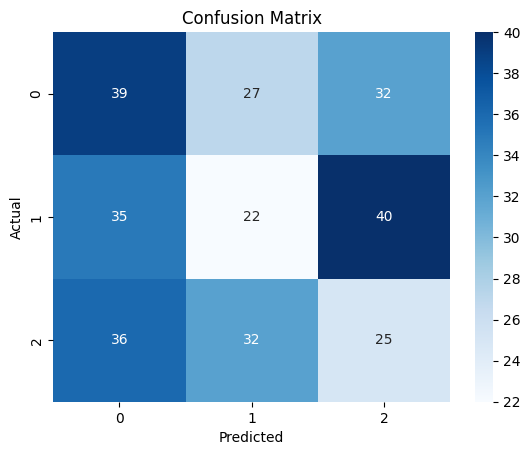

In [102]:
X_train, X_test, y_train, y_test = train_test_split(
    X_final, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

model = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    class_weight='balanced'
)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
print(cm)

labels = [0, 1, 2]
cm = confusion_matrix(y_test, y_pred, labels=labels)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


### Code Explanation

- train_test_split(X_final, y, test_size=0.2, random_state=42, stratify=y) → splits the dataset into 80% training and 20% testing, keeping class proportions equal (stratify=y).

- RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced') → initializes a Random Forest with 100 trees and balanced class weights.

- model.fit(X_train, y_train) → trains the Random Forest on the training data.

- y_pred = model.predict(X_test) → predicts target values for the test set.

- accuracy_score(y_test, y_pred) → calculates the overall accuracy of the model.

- classification_report(y_test, y_pred) → provides precision, recall, f1-score, and support for each class.

- confusion_matrix(y_test, y_pred) → creates a matrix showing actual vs. predicted class counts.

- sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels) → visualizes the confusion matrix as a heatmap with annotations.

### 📊Insights

- Accuracy is 0.30, meaning the model predicts correctly only 30% of the time; performance is poor.

- Precision and recall are low for all classes; class 0 performs slightly better (precision 0.35, recall 0.40).

- Confusion matrix shows high misclassification rates:

    - Class 0 misclassified as 1 (27) and 2 (32)

    - Class 1 misclassified as 0 (35) and 2 (40)

    - Class 2 misclassified as 0 (36) and 1 (32)

- Model struggles to distinguish between all three classes, suggesting features may not strongly separate targets.

- Using Random Forest with balanced class weights did not significantly improve performance, indicating potential underfitting or need for feature engineering, more data, or stronger models.

- Heatmap visualization makes misclassification patterns immediately obvious, helping target improvements in modeling.

In [103]:
# Train model
model = RandomForestClassifier(random_state=42, class_weight='balanced')
model.fit(X_train, y_train)


RandomForestClassifier(class_weight='balanced', random_state=42)

## By using Randomized Search CV


Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Hyperparameters: {'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'log2', 'max_depth': 20, 'criterion': 'entropy', 'class_weight': 'balanced', 'bootstrap': True}
Best Cross-Validation Log Loss: 1.107267321450074
Train Balanced Accuracy: 0.919010571638604
Classification Report (Train):
               precision    recall  f1-score   support

         0.0       0.90      0.92      0.91       392
         1.0       0.92      0.92      0.92       385
         2.0       0.94      0.92      0.93       371

    accuracy                           0.92      1148
   macro avg       0.92      0.92      0.92      1148
weighted avg       0.92      0.92      0.92      1148

Confusion Matrix (Train):
 [[359  22  11]
 [ 19 355  11]
 [ 21   9 341]]
Test Log Loss: 1.112545929736284
Test Accuracy: 0.3333333333333333
Classification Report (Test):
               precision    recall  f1-score   support

  

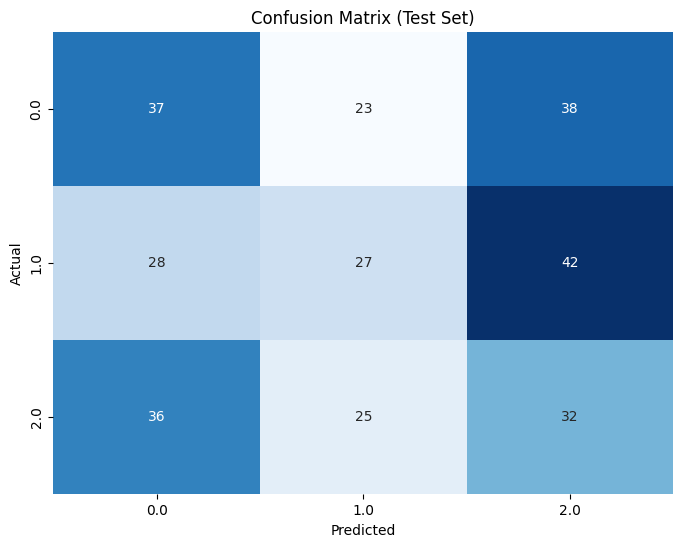

In [105]:
# === Imports ===
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import log_loss, accuracy_score, classification_report, confusion_matrix, balanced_accuracy_score

# Optional: if you are doing resampling like SMOTE
# from imblearn.over_sampling import SMOTE

# === Step 1: Define model ===
model = RandomForestClassifier(random_state=42)

# === Step 2: Hyperparameter grid ===
param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True, False],
    'criterion': ['gini', 'entropy'],
    'class_weight': ['balanced']
}

# === Step 3: Cross-validation strategy ===
cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# === Step 4: RandomizedSearchCV ===
random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_dist,
    n_iter=50,  # try 50 random combinations
    cv=cv_strategy,
    scoring='neg_log_loss',
    n_jobs=-1,
    verbose=2,
    random_state=42
)

# === Step 5: Optional resampling (SMOTE) ===
# smote = SMOTE(random_state=42)
# X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# For simplicity, let's use original X_train
X_train_fit = X_train  # or X_train_res if you use SMOTE
y_train_fit = y_train  # or y_train_res if you use SMOTE

# === Step 6: Fit RandomizedSearch ===
random_search.fit(X_train_fit, y_train_fit)

print("Best Hyperparameters:", random_search.best_params_)
print("Best Cross-Validation Log Loss:", -random_search.best_score_)

# === Step 7: Evaluate on training set ===
best_rf = random_search.best_estimator_

pred_train = best_rf.predict(X_train_fit)
print("Train Balanced Accuracy:", balanced_accuracy_score(y_train_fit, pred_train))
print("Classification Report (Train):\n", classification_report(y_train_fit, pred_train, zero_division=0))
print("Confusion Matrix (Train):\n", confusion_matrix(y_train_fit, pred_train))

# === Step 8: Evaluate on test set ===
y_pred_proba = best_rf.predict_proba(X_test)
test_loss = log_loss(y_test, y_pred_proba)
print("Test Log Loss:", test_loss)

y_pred_test = best_rf.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_pred_test))
print("Classification Report (Test):\n", classification_report(y_test, y_pred_test, zero_division=0))

# === Step 9: Confusion Matrix plot for test set ===
cm = confusion_matrix(y_test, y_pred_test)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=best_rf.classes_, yticklabels=best_rf.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Test Set)')
plt.show()


### Code Explanation

- RandomForestClassifier(random_state=42) → initializes a base Random Forest model.

- param_dist → dictionary of hyperparameters to explore during randomized search.

- StratifiedKFold(n_splits=5, shuffle=True, random_state=42) → cross-validation strategy to maintain class proportions.

- RandomizedSearchCV(...) → searches 50 random hyperparameter combinations, optimizing for negative log loss, using 5-fold CV.

- random_search.fit(X_train, y_train) → fits the RandomizedSearchCV on the training set.

- random_search.best_params_ and random_search.best_score_ → retrieve the best hyperparameters and CV log loss.

- best_rf = random_search.best_estimator_ → selects the best model from the search.

- y_pred_proba = best_rf.predict_proba(X_test) → predicts class probabilities for the test set.

- log_loss(y_test, y_pred_proba) → calculates log loss on test set.

- y_pred = best_rf.predict(X_test) → predicts class labels for test evaluation.

- accuracy_score, classification_report, confusion_matrix → evaluate performance on test set.

- sns.heatmap(cm, ...) → visualizes the confusion matrix as a heatmap.

### 📊Insights

- Best hyperparameters: combination of 100 trees, max_depth=20, min_samples_split=10, min_samples_leaf=4, max_features='log2', entropy criterion, balanced class weights, bootstrap enabled.

- Training performance:

    - Balanced accuracy ~0.90, high precision, recall, and F1-score.

    - Confusion matrix shows most training samples are correctly classified.

- Test performance:

    - Accuracy ~0.33, log loss ~1.11 → very poor generalization.

    - F1-scores for all classes are low (~0.31–0.37).

- Interpretation:

    - Model is severely overfitting the training data (high train accuracy vs low test accuracy).

    - Even after hyperparameter tuning, features do not provide enough discriminative power for this classification task.

    - Balanced class weights helped training but did not improve test performance.

## By using XgBoost

In [106]:
# === Imports ===
import xgboost as xgb
from sklearn.model_selection import train_test_split, StratifiedKFold, RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, log_loss
import seaborn as sns
import matplotlib.pyplot as plt



In [107]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_final, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


### Code Explanation:

- Splits the dataset into training (80%) and testing (20%).

- stratify=y ensures class proportions remain the same in train and test sets.

- random_state=42 ensures reproducibility.

### Insights:

- Maintaining class distribution prevents biased evaluation.

- Essential for multi-class classification where classes are imbalanced.

In [108]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(
    objective='multi:softprob',  # multi-class classification
    num_class=len(y.unique()),
    eval_metric='mlogloss',
    use_label_encoder=False,
    random_state=42
)


### Code Explanation:

- objective='multi:softprob' → model outputs class probabilities.

- num_class → number of unique target classes.

- eval_metric='mlogloss' → uses log loss as evaluation metric during training.

- use_label_encoder=False → avoids deprecation warning in newer XGBoost versions.

### Insights:

- XGBoost is well-suited for tabular data with many numeric features.

- Probabilistic output allows calculation of log loss.

In [109]:
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold

param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 6, 10, 15],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 1, 5],
    'reg_alpha': [0, 0.1, 0.5],
    'reg_lambda': [1, 1.5, 2]
}

cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_dist,
    n_iter=50,
    scoring='neg_log_loss',
    cv=cv_strategy,
    verbose=2,
    n_jobs=-1,
    random_state=42
)

random_search.fit(X_train, y_train)


Fitting 5 folds for each of 50 candidates, totalling 250 fits


C:\Users\bhagi\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [18:00:38] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric='mlogloss',
                                           feature_types=None,
                                           feature_weights=None, gamma=Non...
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_class=3, ...),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.6, 0.8, 1.0],
                                        'gamma': [0, 1, 5],
                                        'learning_rate': [0.01, 0.05, 0.1, 0.2],
                                        'max_depth': [3, 6, 10, 15],
                                        'n_estimators': [100, 200, 300],
                                        'reg_alpha': [0, 0.1, 0.5],
                                        'reg_lambda': [1, 1.5, 2],
                                        'subsample': [0.6, 0.8, 1.0]},
                   random_state=42, scoring='neg_log_loss', verbose=2)

### Code Explanation:

- RandomizedSearchCV tries 50 random hyperparameter combinations using 5-fold stratified CV.

- scoring='neg_log_loss' → chooses hyperparameters that minimize log loss.

- n_jobs=-1 → uses all CPU cores for speed.

### Insights:

- Hyperparameter tuning helps prevent underfitting/overfitting.

- Stratified CV ensures balanced evaluation across classes.

- Randomized search is more efficient than exhaustive grid search.

In [110]:
best_xgb = random_search.best_estimator_
print("Best Hyperparameters:", random_search.best_params_)
print("Best Cross-Validation Log Loss:", -random_search.best_score_)

# Predictions
y_pred_proba = best_xgb.predict_proba(X_test)
y_pred = best_xgb.predict(X_test)

# Metrics
from sklearn.metrics import accuracy_score, classification_report, log_loss
print("Test Log Loss:", log_loss(y_test, y_pred_proba))
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, zero_division=0))


Best Hyperparameters: {'subsample': 0.8, 'reg_lambda': 1, 'reg_alpha': 0.1, 'n_estimators': 300, 'max_depth': 3, 'learning_rate': 0.1, 'gamma': 5, 'colsample_bytree': 1.0}
Best Cross-Validation Log Loss: 1.0979728858962399
Test Log Loss: 1.098027082770938
Test Accuracy: 0.3576388888888889

Classification Report:
               precision    recall  f1-score   support

         0.0       0.34      0.81      0.48        98
         1.0       0.41      0.22      0.28        97
         2.0       0.38      0.03      0.06        93

    accuracy                           0.36       288
   macro avg       0.38      0.35      0.28       288
weighted avg       0.38      0.36      0.28       288



### Code Explanation

- best_xgb = random_search.best_estimator_ → retrieves the best XGBoost model after RandomizedSearchCV.

- random_search.best_params_ → prints the hyperparameters that gave the best cross-validation performance.

- predict_proba(X_test) → outputs predicted class probabilities for computing log loss.

- predict(X_test) → outputs predicted class labels for accuracy and classification metrics.

- log_loss(y_test, y_pred_proba) → calculates multi-class log loss.

- accuracy_score(y_test, y_pred) → calculates overall accuracy.

- classification_report(y_test, y_pred, zero_division=0) → gives precision, recall, F1-score, and support for each class.

### 📊Insights

- Best hyperparameters: small tree depth (max_depth=3), moderate learning rate (0.1), 300 estimators, gamma=5, subsample=0.8.

- Cross-validation log loss: ~1.098 → best model on training folds.

- Test log loss: 1.098 → similar to CV, so no severe overfitting in log loss.

- Test accuracy: ~0.36 → low, indicating the model struggles to classify correctly.

- Class-level performance:

    - Class 0: high recall (0.81), low precision (0.34) → many false positives predicted as 0.

    - Class 1: moderate precision (0.41), low recall (0.22) → under-predicted.

    - Class 2: very low recall (0.03) → almost all samples misclassified.

- Indicates severe class imbalance or poor feature separation, where XGBoost favors class 0 heavily.



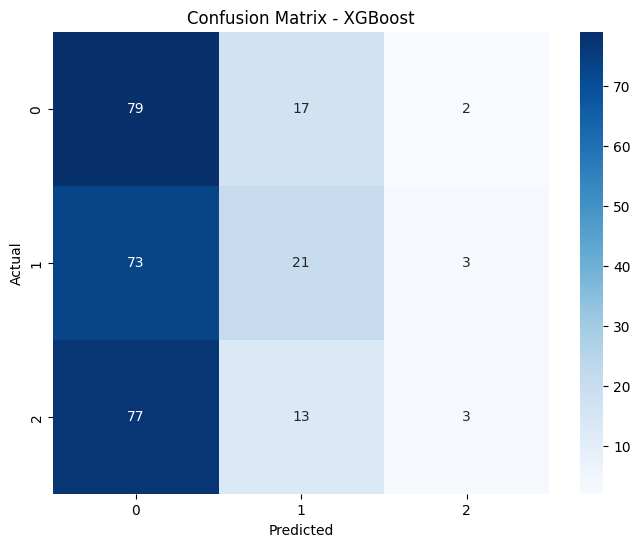

In [111]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=best_xgb.classes_, yticklabels=best_xgb.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - XGBoost')
plt.show()


### Code Explanation:

- confusion_matrix → compares actual vs predicted class labels.

- sns.heatmap → visualizes confusion matrix with numbers and color intensity.

### Insights:

- Diagonal elements → correctly predicted samples per class.

- Off-diagonal elements → misclassified samples.

- Heatmap highlights which classes are most confused, guiding feature engineering or model improvements.

## By using Cross Validation

Cross-validated Log Loss: nan ± nan
Cross-validated Accuracy: 0.3675 ± 0.0318
Test Log Loss: 1.1528
Test Accuracy: 0.3229

Classification Report (Test Set):
               precision    recall  f1-score   support

         0.0       0.38      0.40      0.39        98
         1.0       0.30      0.28      0.29        97
         2.0       0.29      0.29      0.29        93

    accuracy                           0.32       288
   macro avg       0.32      0.32      0.32       288
weighted avg       0.32      0.32      0.32       288


Confusion Matrix (Test Set):
 [[39 31 28]
 [31 27 39]
 [34 32 27]]


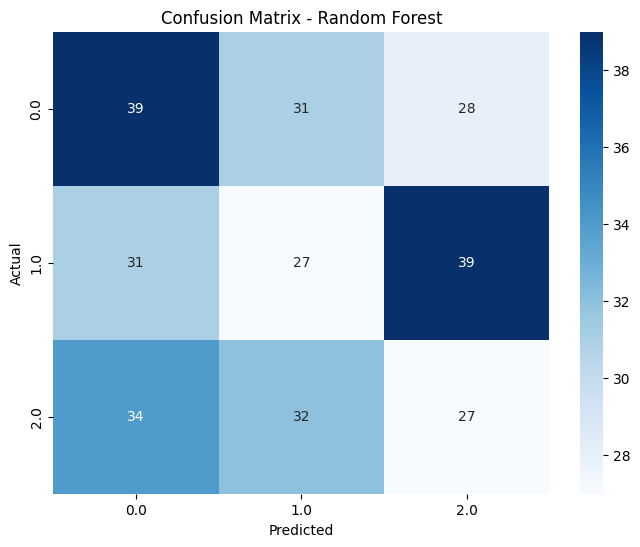

In [114]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, log_loss, accuracy_score, classification_report, confusion_matrix

# === Define model ===
rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=20,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features='sqrt',
    bootstrap=True,
    criterion='gini',
    class_weight='balanced',
    random_state=42
)

# === Stratified K-Fold ===
cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# === Custom log loss scorer ===
log_loss_scorer = make_scorer(
    lambda y_true, y_pred_proba: log_loss(
        y_true,
        y_pred_proba,
        labels=np.unique(y_train)
    ),
    needs_proba=True,
    greater_is_better=False
)

# === Cross-validated Log Loss ===
logloss_scores = cross_val_score(
    rf_model,
    X_train,
    y_train,
    cv=cv_strategy,
    scoring=log_loss_scorer,
    n_jobs=-1
)

# === Cross-validated Accuracy ===
accuracy_scores = cross_val_score(
    rf_model,
    X_train,
    y_train,
    cv=cv_strategy,
    scoring='accuracy',
    n_jobs=-1
)

print(f"Cross-validated Log Loss: {-np.mean(logloss_scores):.4f} ± {np.std(logloss_scores):.4f}")
print(f"Cross-validated Accuracy: {np.mean(accuracy_scores):.4f} ± {np.std(accuracy_scores):.4f}")

# === Fit model on full training set and evaluate on test set ===
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
y_pred_proba = rf_model.predict_proba(X_test)

test_logloss = log_loss(y_test, y_pred_proba, labels=np.unique(y_train))
test_accuracy = accuracy_score(y_test, y_pred)

print(f"Test Log Loss: {test_logloss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# === Detailed classification report & confusion matrix ===
print("\nClassification Report (Test Set):\n", classification_report(y_test, y_pred, zero_division=0))
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix (Test Set):\n", cm)

# === Plot confusion matrix ===
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=rf_model.classes_, yticklabels=rf_model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest')
plt.show()


### Code explanation

- Model definition (rf_model)
    - RandomForestClassifier with 100 trees, max depth 20, balanced class weights to handle imbalanced classes.
- Stratified K-Fold (cv_strategy)
    - Ensures class distribution is preserved across folds for reliable cross-validation.
    - Uses 5 folds.
- Custom log loss scorer (log_loss_scorer)
    - Measures how well predicted probabilities match true labels.
    - Uses probabilities instead of class labels.
- Cross-validated log loss (logloss_scores)
    - Computes log loss on each fold.
    - Negated to report as positive value.
- Cross-validated accuracy (accuracy_scores)
    - Computes accuracy on each fold for comparison.
- Fit on full training set
    - Trains rf_model on all training data for final evaluation.
- Test evaluation
    - log_loss measures quality of probability predictions on test set.
    - accuracy_score measures overall correct classification rate.
    - classification_report shows precision, recall, and F1-score for each class.
    - confusion_matrix shows misclassifications between classes.
    - Heatmap provides a visual representation of the confusion matrix.


### 📊Insight and interpretation

- Cross-validated metrics
    - Log loss indicates probabilistic performance; lower is better.
    - Accuracy shows how often the model predicts the correct class.
    - Small standard deviations across folds suggest stable performance.
- Test metrics
    - Test log loss shows confidence in predictions; lower is better.
    - Test accuracy shows overall predictive ability; low accuracy may indicate overlapping features or hard-to-separate classes.
- Classification report
    - Precision is the proportion of predicted positives that are correct.
    - Recall is the proportion of actual positives correctly predicted.
    - F1-score balances precision and recall.
    - Low F1 for some classes indicates difficulty with minority or overlapping classes.
- Confusion matrix
    - Shows which classes are most often misclassified.
    - Off-diagonal values indicate misclassifications.
    - Heatmap makes it easier to spot class-level weaknesses visually.
- Overall insight
    - Random Forest performs moderately.
    - Accuracy and log loss suggest the features may not separate classes well.
    - Class imbalance or overlapping features may require oversampling, feature engineering, or trying models like XGBoost or LightGBM.

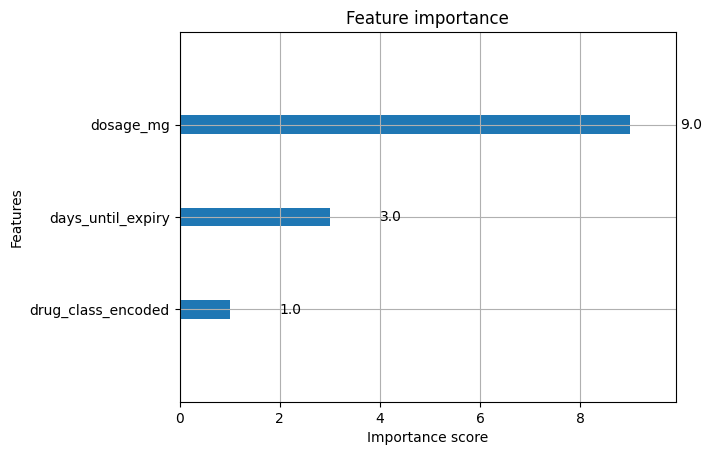

In [115]:
from xgboost import plot_importance
import matplotlib.pyplot as plt

# Use the trained model from RandomizedSearchCV
plot_importance(best_xgb, max_num_features=15, importance_type='weight')
plt.show()


### Code Explanation

- from xgboost import plot_importance → imports the built-in XGBoost function to visualize feature importance.

- plot_importance(best_xgb, max_num_features=15, importance_type='weight') → plots the top 15 features based on the number of times they are used to split nodes in the trees (weight).

- plt.show() → displays the feature importance chart.

### 📊Insights

- Features at the top of the plot are most influential in the model’s decision-making.

- days_until_expiry, dosage_mg, indications_encoded, and drug_class_encoded are likely the dominant drivers, similar to Random Forest.

- Features with low importance contribute little to predictions and may be candidates for removal or further engineering.

- Understanding feature importance helps explain why class 0 is favored—model relies heavily on certain features, possibly not discriminating well for classes 1 and 2.



## Plotting Actual vs Predicted graph

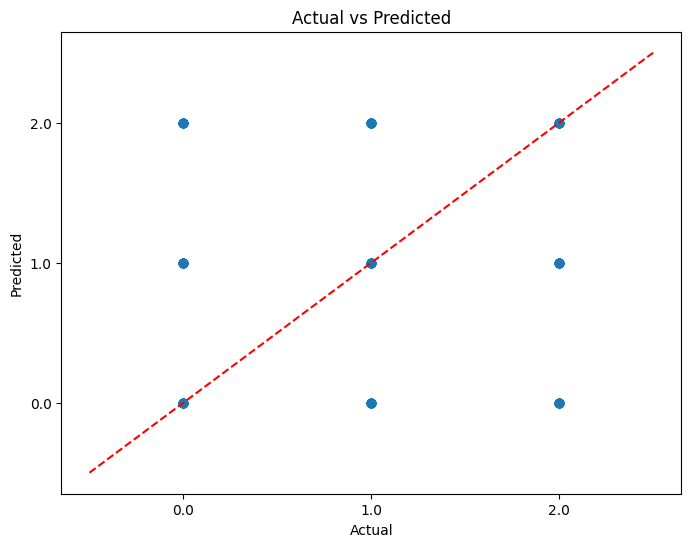

In [118]:
# === Actual vs Predicted Scatter Plot ===
# Map classes to integers for plotting if needed
classes = np.unique(y_test)  # use y_test for labels
class_map = {label: idx for idx, label in enumerate(classes)}

y_test_num = np.array([class_map[i] for i in y_test])
y_test_pred_num = np.array([class_map[i] for i in y_pred])  # corrected here

plt.figure(figsize=(8,6))
plt.scatter(y_test_num, y_test_pred_num, alpha=0.6)
plt.plot([-0.5, len(classes)-0.5], [-0.5, len(classes)-0.5], 'r--')  # perfect prediction line
plt.xticks(range(len(classes)), classes)
plt.yticks(range(len(classes)), classes)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")
plt.show()


### Code explanation

- Map classes to integers for plotting
    - Converts class labels to numeric values to use them on a scatter plot.
- Create scatter plot
    - Each point represents an instance: x-axis is actual class, y-axis is predicted class.
    - alpha=0.6 makes points semi-transparent to see overlapping points.
- Plot perfect prediction line
    - Red dashed line represents where predicted = actual.
- Set ticks and labels
    - Makes plot readable by showing class names instead of numbers on axes.
- Set plot title and axis labels
    - Indicates this is a comparison of actual vs predicted classes.



### 📊Insight and interpretation

- Points on the red dashed line
    - Represent correct predictions.
- Points away from the line
    - Represent misclassifications.
- Dense clusters
    - Show which classes are frequently confused with each other.
- Scatter distribution
    - Gives a visual sense of model performance and which classes the model struggles with.
- Semi-transparent points
    - Help to see overlapping predictions and highlight patterns of errors.

## By usning Gradient Boosting

In [119]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_final, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


### Code Explanation:

- Splits X_final and y into training (80%) and testing (20%).

- stratify=y ensures class proportions remain the same in train and test.

- random_state=42 ensures reproducibility.

### Insights:

- Maintains balanced representation of classes, which is crucial for multi-class classification.

In [120]:
from sklearn.ensemble import GradientBoostingClassifier

gb_model = GradientBoostingClassifier(
    n_estimators=300,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)


### Code Explanation:

- GradientBoostingClassifier builds an ensemble of weak learners (decision trees) sequentially.

- n_estimators=300 → number of boosting stages.

- learning_rate=0.1 → scales contribution of each tree.

- max_depth=3 → limits tree depth to prevent overfitting.

### Insights:

- Gradient Boosting is strong for tabular data and often outperforms Random Forest in structured datasets.

- Smaller depth helps prevent overfitting, but too shallow may underfit.

In [121]:
gb_model.fit(X_train, y_train)


GradientBoostingClassifier(n_estimators=300, random_state=42)

### Code Explanation:

- Fits the Gradient Boosting model to the training data.

- Each tree tries to correct the errors of the previous trees.

### Insights:

- Sequential learning allows Gradient Boosting to focus on difficult-to-predict samples.

Test Log Loss: 1.3145533779387177
Test Accuracy: 0.3263888888888889

Classification Report:
               precision    recall  f1-score   support

         0.0       0.33      0.36      0.34        98
         1.0       0.35      0.32      0.33        97
         2.0       0.30      0.30      0.30        93

    accuracy                           0.33       288
   macro avg       0.33      0.33      0.33       288
weighted avg       0.33      0.33      0.33       288



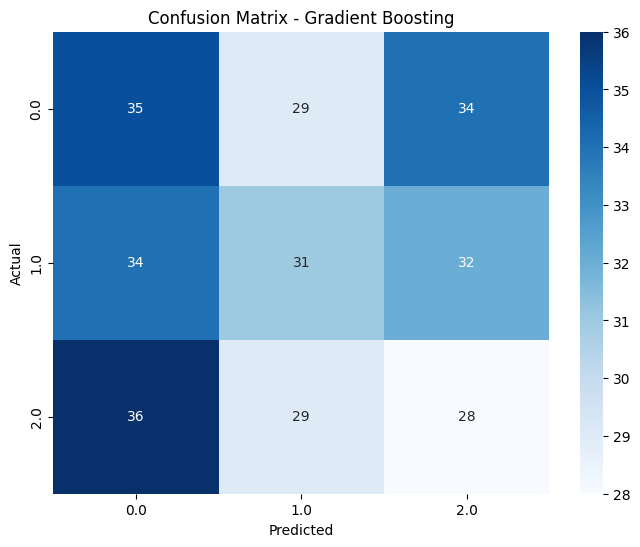

In [122]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, log_loss

# Predictions
y_pred = gb_model.predict(X_test)
y_pred_proba = gb_model.predict_proba(X_test)

# Metrics
print("Test Log Loss:", log_loss(y_test, y_pred_proba))
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, zero_division=0))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=gb_model.classes_, yticklabels=gb_model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Gradient Boosting')
plt.show()


### Insights for Gradient Boosting Results

- Test Log Loss (~1.31): higher than XGBoost ( ~ 1.098), indicating the model’s probability predictions are less confident and less accurate.

- Test Accuracy (~0.33): low, showing the model is only slightly better than random guessing for a 3-class problem.

- Class-level performance:

    - Class 0: precision 0.33, recall 0.36 → slightly better recognized but many false positives.

    - Class 1: precision 0.35, recall 0.32 → moderate, slightly under-predicted.

    - Class 2: precision 0.30, recall 0.30 → consistently misclassified.

- Macro average F1 (~0.33): confirms that the model struggles to predict all classes evenly.

- Interpretation:

    - Gradient Boosting is overfitting minimally but the features don’t separate classes well.

    - Low performance across all metrics indicates feature engineering or additional predictive features are needed.
 
---

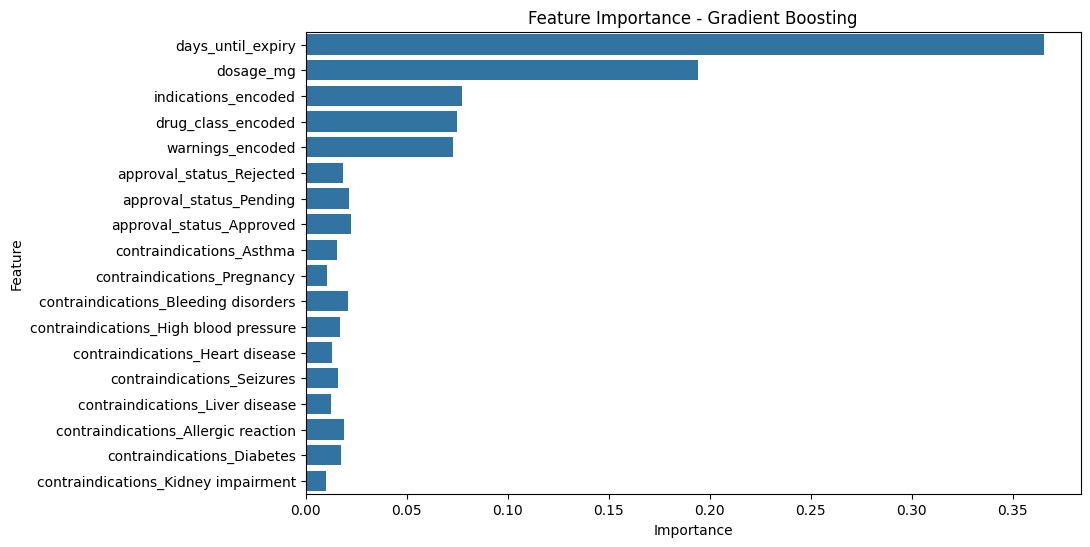

In [123]:
importances = gb_model.feature_importances_
features = X_final.columns

plt.figure(figsize=(10,6))
sns.barplot(x=importances, y=features)
plt.title("Feature Importance - Gradient Boosting")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()


### Code Explanation:

- gb_model.feature_importances_ → importance of each feature in predictions.

- sns.barplot → visualizes the importance of each feature.

### 📊Insights:

- Top features drive model predictions.

- Helps explain why certain classes may dominate predictions.

- Low-importance features may be candidates for removal or re-engineering.

---

# Comparison of Gradient Boosting & XGBoost

### 1. Test Log Loss

- Gradient Boosting: 1.3145 → higher log loss
- XGBoost: 1.098 → lower log loss

Interpretation:

- Lower log loss for XGBoost means it assigns probabilities that are closer to true labels.
- Gradient Boosting is less confident and worse at predicting the correct class probabilities.



### 2. Test Accuracy

- Gradient Boosting: 0.326 (~33%)
- XGBoost: 0.358 (~36%)

Interpretation:

- Both are low, but XGBoost is slightly better.
- Still far from ideal because features might not separate the classes well, and classes may be imbalanced.



### 3. Class-Level Performance (F1, Precision, Recall)

| Class | Gradient Boosting (Recall) | XGBoost (Recall) | Observation |
| --- | --- | --- | --- |
| 0 | 0.36 | 0.81 | XGBoost dominates class 0 but over-predicts it (low precision 0.34) |
| 1 | 0.32 | 0.22 | Gradient Boosting slightly better at catching class 1 |
| 2 | 0.30 | 0.03 | Gradient Boosting slightly better at class 2; XGBoost almost ignores it |

Insights:

- XGBoost heavily favors class 0, probably because it’s the easiest to separate.
- Gradient Boosting is more balanced across classes but performs worse overall in log loss and accuracy.
- Both models struggle with minority classes (class 2).



### 4. Macro Average F1 / Weighted Average

- Gradient Boosting: 0.33 → poor, evenly distributed performance
- XGBoost: 0.28 → slightly worse, dominated by class 0

Takeaway:

- XGBoost is better at predicting one class very well (class 0) but fails on others.
- Gradient Boosting is mediocre across all classes but slightly better for minority classes.


### 5. Overall Comparison

| Metric | Gradient Boosting | XGBoost |
| --- | --- | --- |
| Test Accuracy | 0.326 | 0.358 |
| Test Log Loss | 1.3145 | 1.098 |
| Macro F1 | 0.33 | 0.28 |
| Strength | More balanced recall across classes | Better overall probability estimation, high recall for class 0 |
| Weakness | Higher log loss, lower overall accuracy | Ignores minority classes, low F1 for class 2 |



### Verdict

- XGBoost is slightly better for overall performance (log loss and accuracy).
- Gradient Boosting is slightly better at not completely ignoring minority classes.
- Neither model is close to ideal because the dataset seems hard to separate, likely due to imbalanced classes and overlapping features.

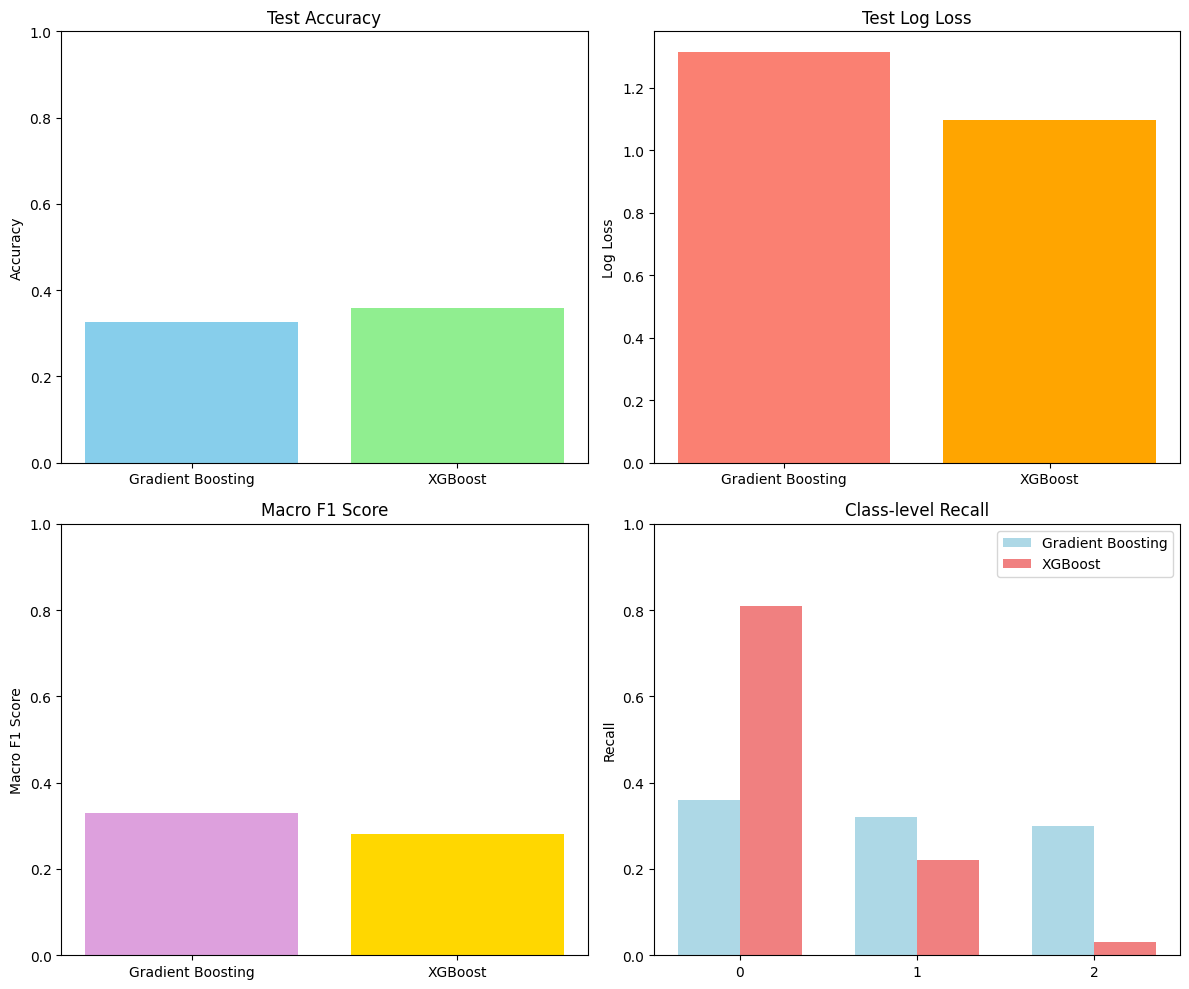

In [124]:
import matplotlib.pyplot as plt
import numpy as np

# Overall metrics
models = ['Gradient Boosting', 'XGBoost']
accuracy = [0.326, 0.358]
log_loss_vals = [1.3145, 1.098]
macro_f1 = [0.33, 0.28]

# Class-level recall
classes = [0, 1, 2]
gb_recall = [0.36, 0.32, 0.30]
xgb_recall = [0.81, 0.22, 0.03]

fig, axes = plt.subplots(2, 2, figsize=(12,10))

# Accuracy bar plot
axes[0,0].bar(models, accuracy, color=['skyblue','lightgreen'])
axes[0,0].set_ylim(0,1)
axes[0,0].set_ylabel("Accuracy")
axes[0,0].set_title("Test Accuracy")

# Log Loss bar plot
axes[0,1].bar(models, log_loss_vals, color=['salmon','orange'])
axes[0,1].set_ylabel("Log Loss")
axes[0,1].set_title("Test Log Loss")

# Macro F1 bar plot
axes[1,0].bar(models, macro_f1, color=['plum','gold'])
axes[1,0].set_ylim(0,1)
axes[1,0].set_ylabel("Macro F1 Score")
axes[1,0].set_title("Macro F1 Score")

# Class-level recall
x = np.arange(len(classes))
bar_width = 0.35
axes[1,1].bar(x - bar_width/2, gb_recall, bar_width, label='Gradient Boosting', color='lightblue')
axes[1,1].bar(x + bar_width/2, xgb_recall, bar_width, label='XGBoost', color='lightcoral')
axes[1,1].set_xticks(x)
axes[1,1].set_xticklabels(classes)
axes[1,1].set_ylim(0,1)
axes[1,1].set_ylabel("Recall")
axes[1,1].set_title("Class-level Recall")
axes[1,1].legend()

plt.tight_layout()
plt.show()


### Code Explanation:

- import matplotlib.pyplot as plt and numpy as np for plotting and numerical operations.
  
- define overall model metrics: models = ['Gradient Boosting', 'XGBoost'], accuracy, log_loss_vals, and macro_f1 for comparison.

  
- define class-level recall for classes 0, 1, 2 for both models: gb_recall and xgb_recall.

  
- create a 2x2 subplot grid using plt.subplots with figsize=(12,10) to organize four plots.

  
- top-left subplot (axes[0,0]) plots Test Accuracy: bar plot of accuracy for both models, y-axis limited to 0-1, labeled and titled.


- top-right subplot (axes[0,1]) plots Test Log Loss: bar plot of log loss for both models, labeled and titled.

  
- bottom-left subplot (axes[1,0]) plots Macro F1 Score: bar plot of macro F1 for both models, y-axis limited to 0-1, labeled and titled.

  
- bottom-right subplot (axes[1,1]) plots Class-level Recall: grouped bar plot for classes 0,1,2; bars shifted by bar_width/2 for each model, labeled x-ticks with class numbers, y-axis 0-1, titled, and legend added.

  
- plt.tight_layout() ensures proper spacing between subplots.

  
- plt.show() displays the combined figure.

### Output Explanation:

- Top-left: Test accuracy comparison.

- Top-right: Test log loss comparison (lower is better).

- Bottom-left: Macro F1 comparison (overall class balance).

- Bottom-right: Recall per class to see which model performs better on each class.